# Things to do 

1. Add Eigenvalue spectrum plots for the report 
2. For the *onew_gd* folders, plot the distribution of the overlaps and the energies. For the RS-UNSAT case, we will have them falling mostly into the energy corresponding to the $\xi_{mu}$ matrix. 
3. For the fRSB phase, the situation is slightly more interesting but it seems that the energy does actually fall very close to zero. It could be that I am not waiting enough. This is an important point actually. There doesnt seem to be a well defined approach for finding the true minima it seems, since the energy keeps going to zero. 
4. The multiple stage overlap will require computing overlaps during the R&R procedure and compare it to the beginning and the end. 

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
def mplaw2(gamma, val=False):
    eps = 1e-3
    l_plus = (np.sqrt(gamma)+1)**2 
    if (val):
        l_minus = 0.0
    else:
        l_minus = (np.sqrt(gamma) -1)**2 
#     print l_plus, l_minus
    l_range = np.arange(l_minus, l_plus, eps)
    mp_vals = []
    for l in l_range:
        num = np.sqrt((l-l_minus)*(l_plus-l))
#         print l, num
        den = 2*np.pi*(l*gamma)
        mp_vals.append(num/den)
    mp_vals = np.asarray(mp_vals)
    return l_range, mp_vals

In [4]:
print plt.style.available

[u'seaborn-darkgrid', u'Solarize_Light2', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'fast', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [5]:
import seaborn as sns

# Marchenko Pastur Law. 

Consider the empirical covariance matrix defined as : 

\begin{equation} 
   E_{ij} = \frac{1}{M} \sum_{\mu}^{M} r_{i}^{\mu} r_{j}^{\mu}
\end{equation}

Then the distribution of the eigenvalues is given by :

\begin{equation}
\rho( \lambda) = \frac{\sqrt{4 \lambda q - (\lambda -1 +q)^2}}{2 \pi \lambda q} 
\end{equation}

with $q = \frac{1}{Q}$ with $Q = \frac{M}{N}$. 

If we take the reduced version of the matrix that is with the constraints, then the effective number of degrees of freedom would not be M but rather z i.e. number of unsatisfied constraints. 

In [6]:
def mplaw(alpha):
    eps = 1e-4
    q = 1./alpha
    l_plus = (np.sqrt(q)+1)**2 
    l_minus = (1-np.sqrt(q))**2 
    l_range = np.arange(l_minus, l_plus+eps, eps)
    mp_vals = []
    for l in l_range:
        num = np.sqrt(4*l*q- (l-1+q)**2)
        den = 2*np.pi*(l*q)
        mp_vals.append(num/den)
    mp_vals = np.asarray(mp_vals)
    return l_range, mp_vals
#     if z > 1:
#         return l_range, np.asarray(mp_vals)
#     else:
#         for i in range(len(to_prepend)):
#             l_range = np.insert(l_range, i, to_prepend[i])
#             mp_vals = np.insert(mp_vals,i, 1-z)
#         return l_range, mp_vals

In [7]:
def plot_bar(data):
    results, edges = np.histogram(data, normed=True)
    binWidth = edges[1] - edges[0]
    plt.bar(edges[:-1], results*binWidth, binWidth)

In [142]:
data_evals = np.loadtxt('../onewgd_m0/evals_nc_1._20._200_gd0')
x, y, _ = plt.hist(data_evals[1], density=True, ec="k")
print np.sum(x)
print x

9.68190113811
[ 0.8713711   1.40387567  1.50069468  1.35546616  1.35546616  1.21023764
  0.91978061  0.72614259  0.29045703  0.04840951]


In [11]:
np.sort(data_evals[1])

array([0.610618, 0.618773, 0.62584 , 0.632376, 0.634518, 0.640248,
       0.644978, 0.649472, 0.653148, 0.658058, 0.660396, 0.663769,
       0.674712, 0.682573, 0.686255, 0.687764, 0.691982, 0.694433,
       0.698817, 0.708359, 0.710608, 0.716813, 0.717658, 0.721179,
       0.725783, 0.730343, 0.732553, 0.735872, 0.739729, 0.740497,
       0.743339, 0.747738, 0.754536, 0.756932, 0.760436, 0.764347,
       0.770016, 0.772904, 0.77494 , 0.777503, 0.78021 , 0.783122,
       0.787026, 0.789158, 0.794871, 0.795924, 0.806482, 0.809437,
       0.811793, 0.815205, 0.816961, 0.821893, 0.823531, 0.823914,
       0.826412, 0.83079 , 0.835471, 0.840296, 0.843245, 0.845653,
       0.848949, 0.851145, 0.85223 , 0.856397, 0.861625, 0.863085,
       0.866829, 0.868386, 0.872641, 0.87748 , 0.88103 , 0.88593 ,
       0.887231, 0.892763, 0.893508, 0.897121, 0.900953, 0.901875,
       0.903657, 0.908887, 0.911845, 0.915962, 0.917283, 0.924845,
       0.926693, 0.928951, 0.933591, 0.938979, 0.942296, 0.948

In [16]:
data_evals = np.loadtxt('overlap_m0/evals_nc_1._20._200_0')
print data_evals.shape
plt.hist(data_evals[1],normed=True, ec="k")

(2, 200)


(array([ 1.12782591,  1.40978239,  1.45677513,  1.40978239,  1.31579689,
         1.12782591,  0.89286218,  0.51692021,  0.09398549,  0.04699275]),
 array([ 0.612566 ,  0.7189654,  0.8253648,  0.9317642,  1.0381636,
         1.144563 ,  1.2509624,  1.3573618,  1.4637612,  1.5701606,  1.67656  ]),
 <a list of 10 Patch objects>)

/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


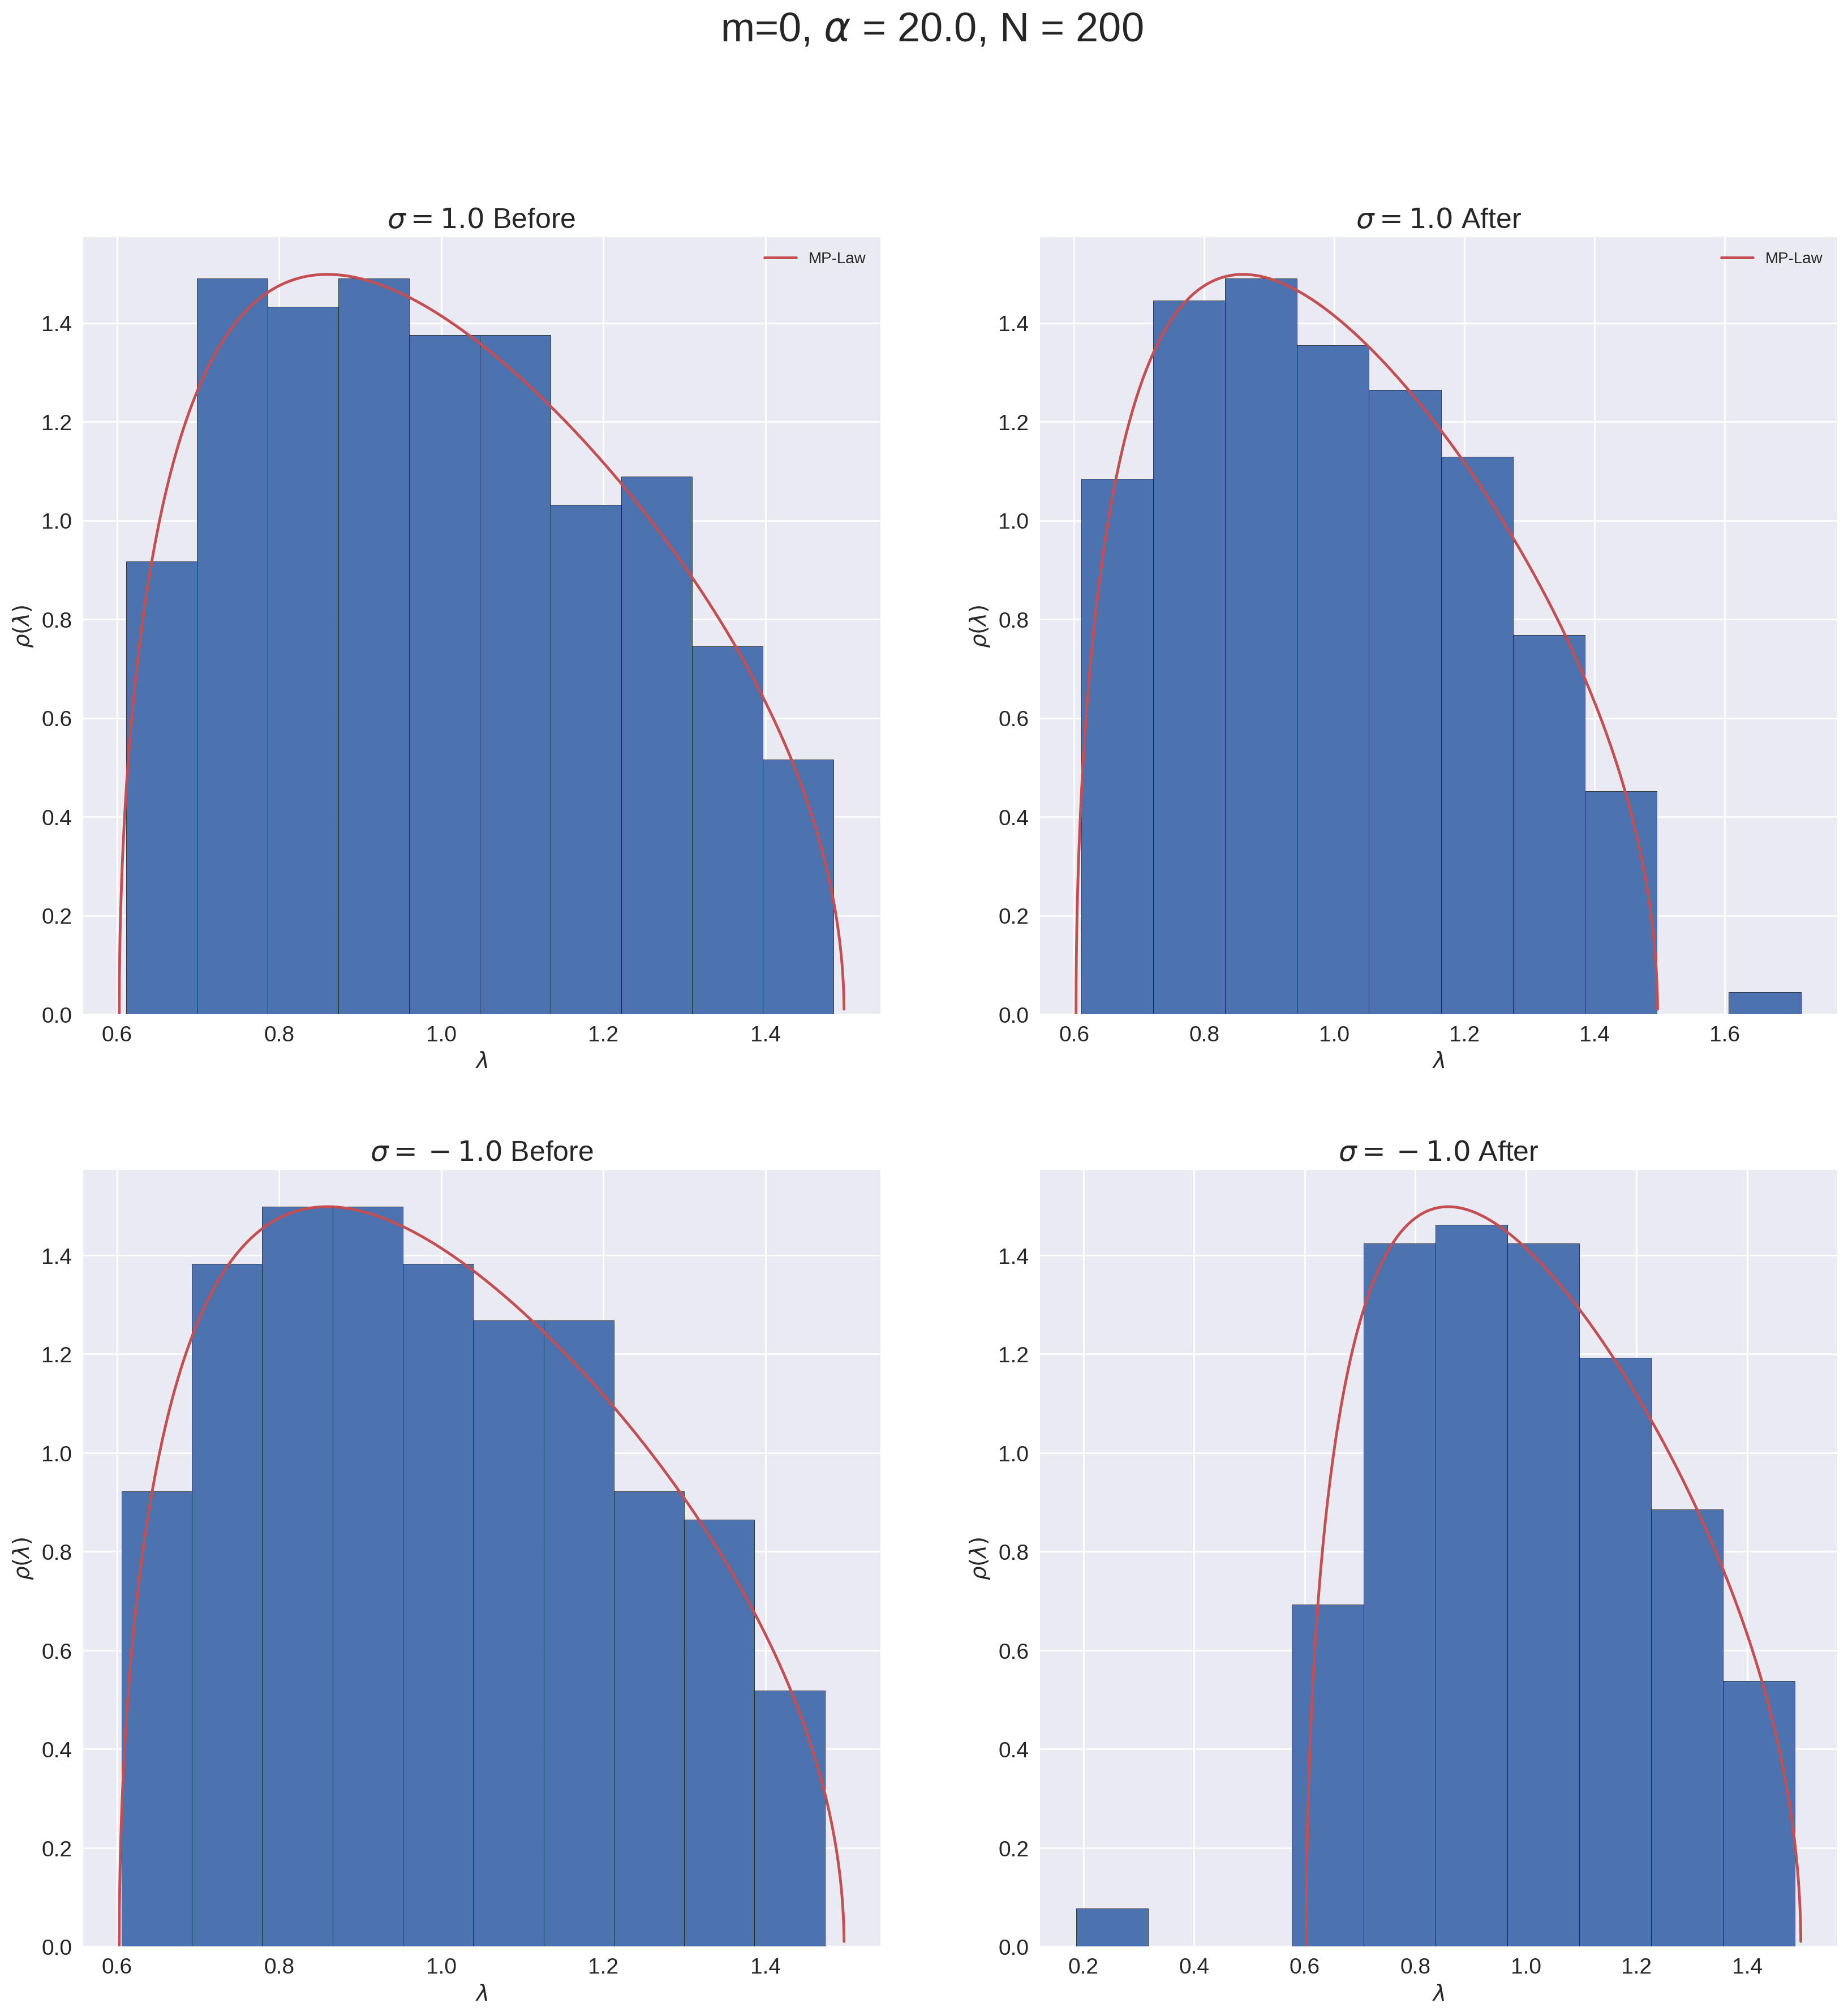

In [15]:
z = 3313.
m=0
i = 0
alpha = 20.0
l,m = mplaw(alpha)
data_evals = np.loadtxt('onew_m0/evals_nc_1._20._200_0')
plt.figure(figsize = (20,20), dpi=200)
plt.subplot(221)
# plt.plot(l_range, np.sqrt((4-l_range)/l_range))
weights = np.ones_like(data_evals[i])/np.size(data_evals[i])
plt.hist(data_evals[i], density=True, weights=weights, ec="k")
plt.plot(l,m, color = 'r', label = 'MP-Law')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('$\\sigma = 1.0$ Before', fontsize = 18)
plt.legend()
i = 1
plt.subplot(222)
z = 2903.
l,m = mplaw(alpha)
plt.hist(data_evals[i], density=True, ec="k")
plt.plot(l,m, color = 'r',label = 'MP-Law')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('$\\sigma = 1.0$ After', fontsize=18)
plt.legend()
data_evals = np.loadtxt('onew_m0/evals_nc_-1._20._200_0')
i=0
plt.subplot(223)
plt.hist(data_evals[i], density=True, weights=weights, ec="k")
plt.plot(l,m, color = 'r',label = 'MP-Law')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('$\\sigma = -1.0$ Before', fontsize=18)

i = 1
plt.subplot(224)
plt.hist(data_evals[i], density=True, weights=weights, ec="k")
plt.plot(l,m, color = 'r',label = 'MP-Law')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('$\\sigma = -1.0$ After', fontsize=18)
plt.suptitle('m={}, $\\alpha$ = 20.0, N = 200'.format(0), fontsize = 26)
# plot_bar(data_evals[i])
plt.savefig('onew_m0/eigen_distrib_nc.pdf')
plt.savefig('onew_m0/eigen_distrib_nc.png')

# Normalized correlation matrix

In [100]:
xi1.shape

(8000, 200)

In [101]:
xi_before = xi1[:4000]
xi_after = xi1[4000:]
print xi_before.shape
print xi_after.shape

(4000, 200)
(4000, 200)


In [61]:
c1 = xi_after.T.dot(xi_after)
c1 = c1/4000

In [62]:
w = np.linalg.eigvals(c1)

In [63]:
w.shape

(200,)

In [64]:
data_evals = np.loadtxt('onew_m0/evals_nc_1._20._200_0')
plt.subplot(221)
plt.hist(w, density=True, ec="k")
plt.subplot(222)
plt.hist(data_evals[1], density=True, ec="k")


(array([1.0841362 , 1.44551493, 1.49068727, 1.35517025, 1.26482556,
        1.12930854, 0.76792981, 0.45172342, 0.        , 0.04517234]),
 array([0.610618 , 0.7213052, 0.8319924, 0.9426796, 1.0533668, 1.164054 ,
        1.2747412, 1.3854284, 1.4961156, 1.6068028, 1.71749  ]),
 <a list of 10 Patch objects>)

Check passed. The matrices have the same eigenvalue spectrum. Lets move on to the normalized distribution

In [143]:
def normalize_matrix(matrix):
    test = np.copy(matrix)
    test = test.T
    for i in range(test.shape[0]):
        mean = np.average(test[i])
        var = np.average(np.square(test[i]))
        test[i] = test[i] - mean
        test[i] = test[i]/np.sqrt(var - mean*mean)
    return test.T

In [144]:
def compute_evals(matrix):
    c = matrix.T.dot(matrix)
    c = c/matrix.shape[0]
    w = np.linalg.eigvals(c)
    return w

In [481]:
dir1 = 'onew_m0/'
dir2 = 'onew_m0.57/'
xi = np.loadtxt('../onewgd_m0/xi_matrix_-1._20._200_gd0')
xi_before = xi[:4000]
xi_after = xi[4000:]
print xi_before.shape
print xi_after.shape

(4000, 200)
(4000, 200)


In [482]:
w1 = compute_evals(xi_before)
w2 = compute_evals(normalize_matrix(xi_before))
w3 = compute_evals(xi_after)
w4 = compute_evals(normalize_matrix(xi_after))

In [483]:
m = 0.57
sigma = -1.0

/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Text(0.5,0.98,u'm = 0, $\\alpha = 20.0$, $\\sigma$ = -1.0')

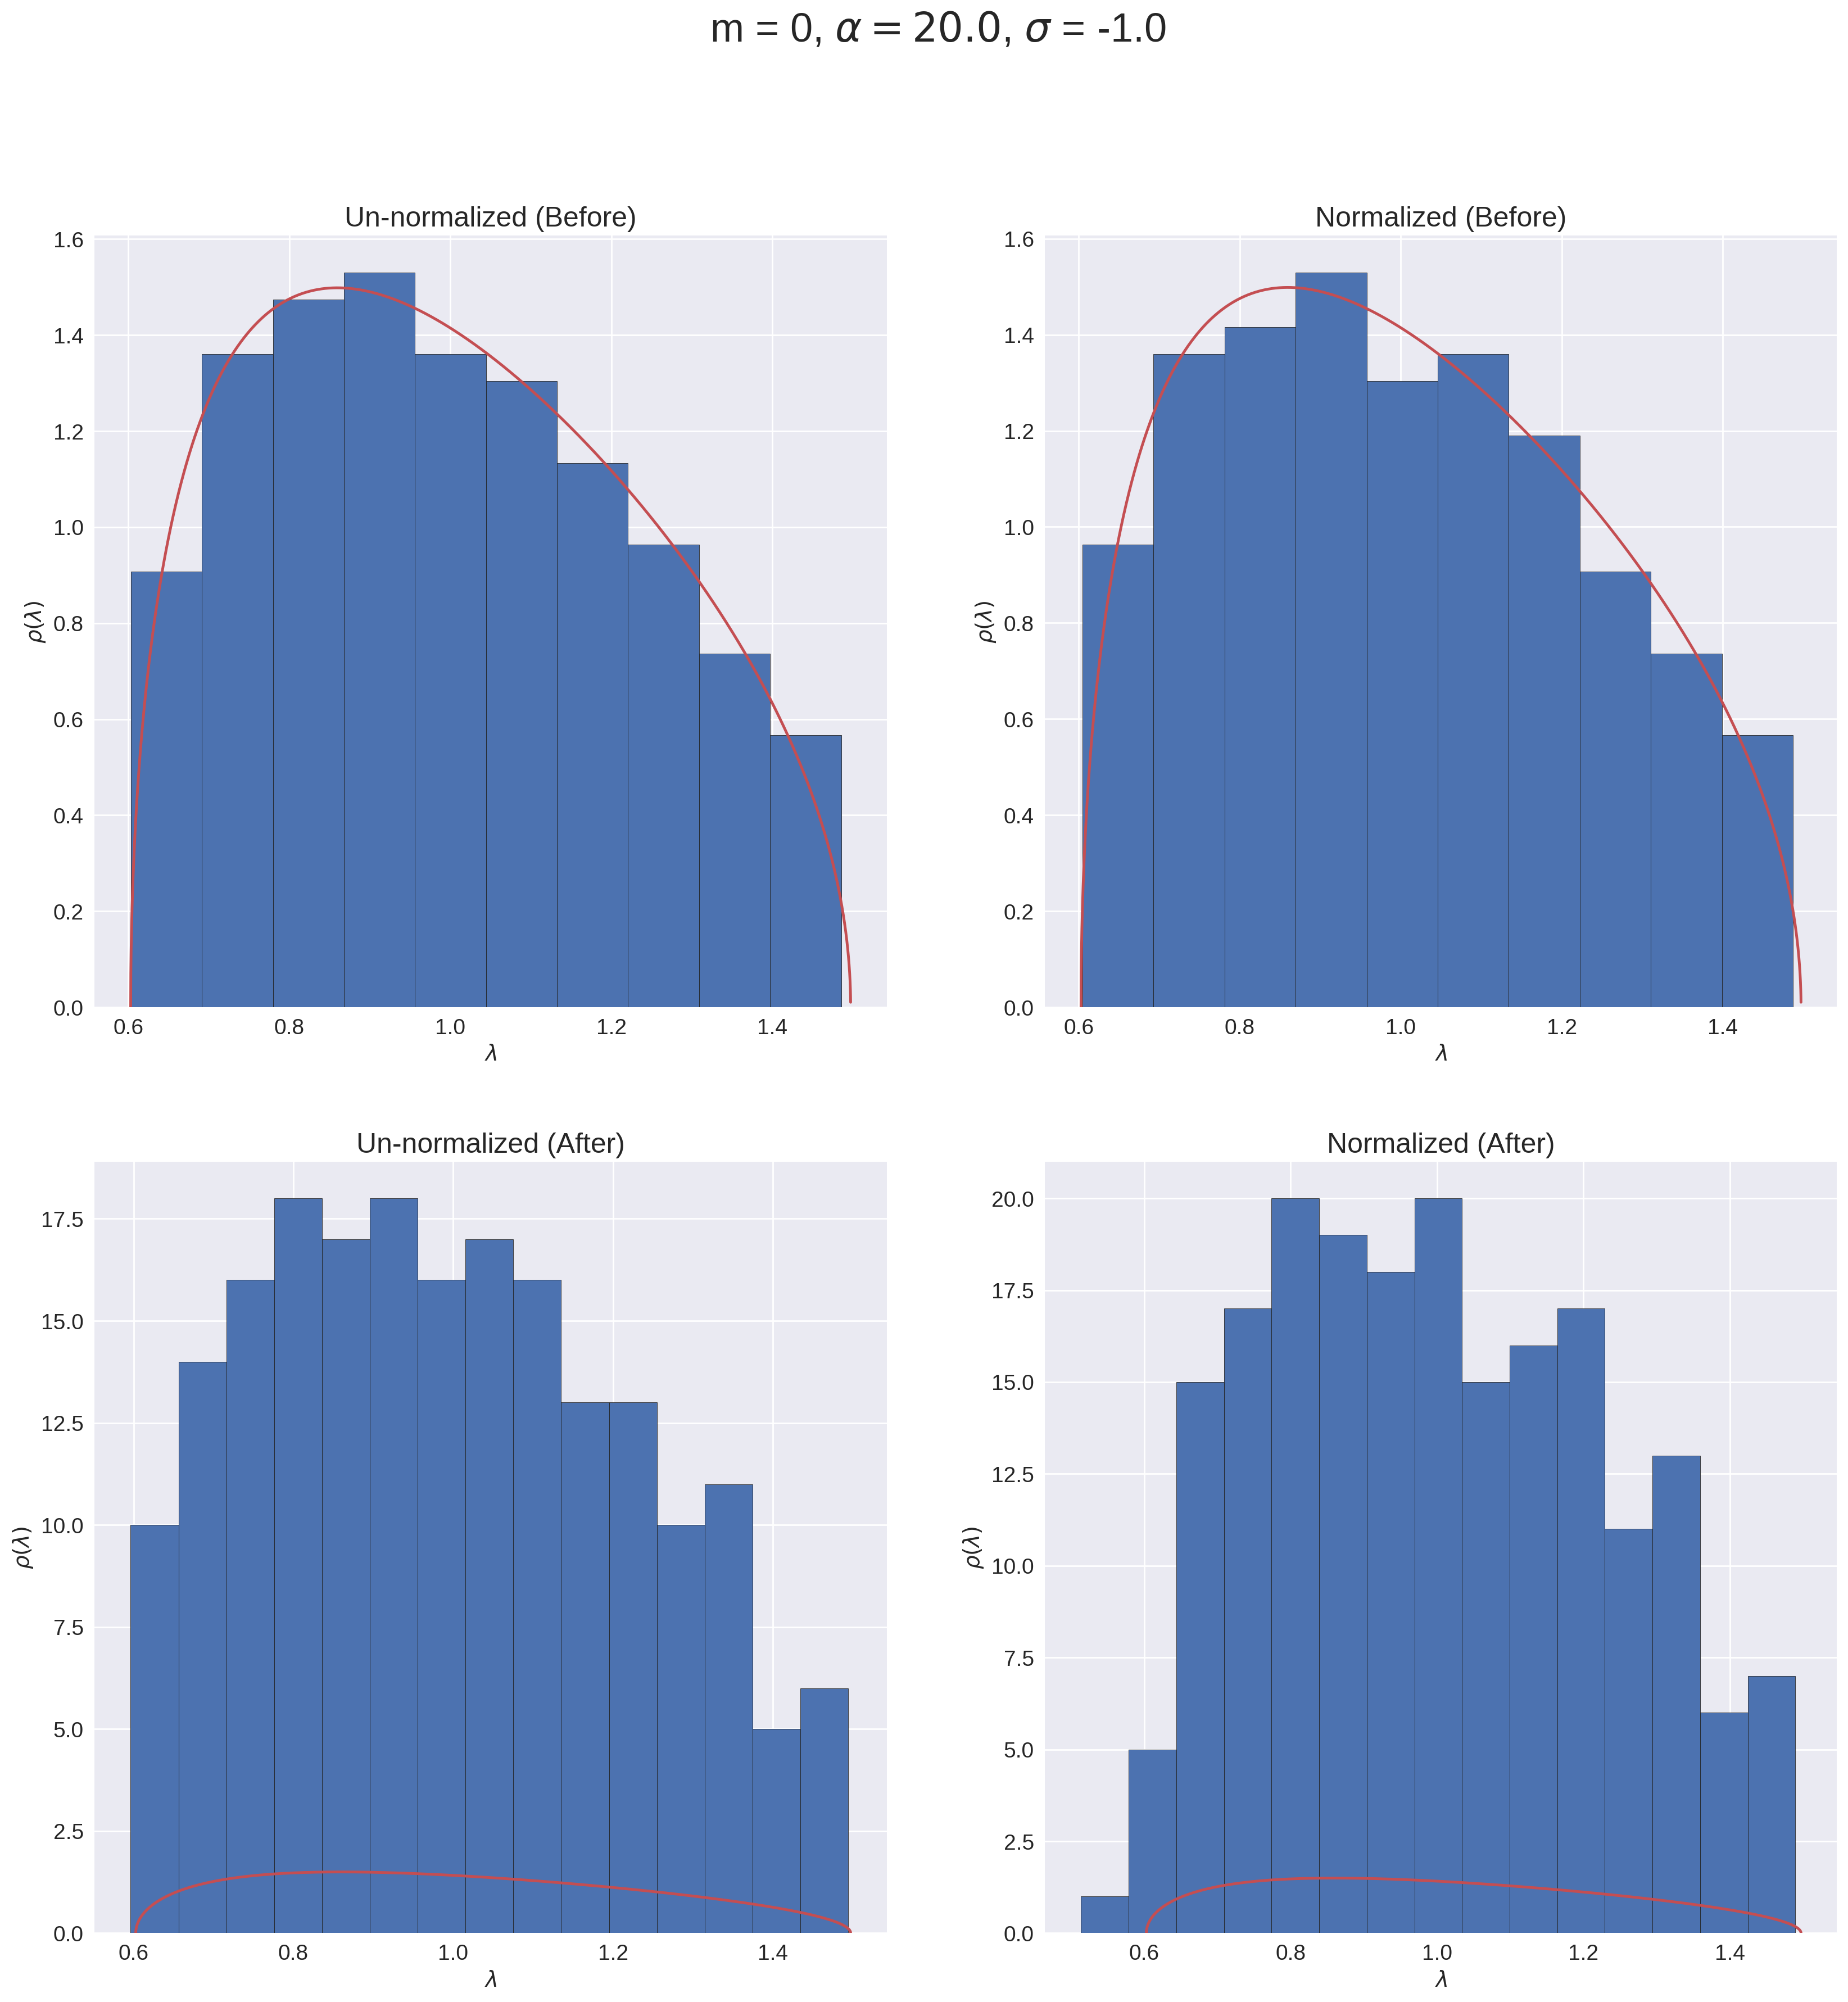

In [489]:
plt.figure(figsize = (20,20), dpi = 200)
l,m = mplaw(20)
plt.subplot(221)
plt.hist(w1,density = True, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Un-normalized (Before)', fontsize = 18)
plt.legend()
plt.subplot(222)
plt.hist(w2, density=True , ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Normalized (Before)', fontsize = 18)
plt.legend()
plt.subplot(223)
x1, y1, _ = plt.hist(w3, bins = 15, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Un-normalized (After)', fontsize = 18)
plt.legend()
plt.subplot(224)
x2, y2, _ = plt.hist(w4, bins=15, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Normalized (After)', fontsize = 18)
plt.legend()
plt.suptitle('m = {}, $\\alpha = 20.0$, $\\sigma$ = {}'.format(0,sigma), fontsize = 26)
# plt.savefig('plots/eigen_distrib_sigma_1.pdf')
# plt.savefig('plots/eigen_distrib_sigma_1.png')

In [490]:
print x1

[10. 14. 16. 18. 17. 18. 16. 17. 16. 13. 13. 10. 11.  5.  6.]


In [491]:
print x2

[ 1.  5. 15. 17. 20. 19. 18. 20. 15. 16. 17. 11. 13.  6.  7.]


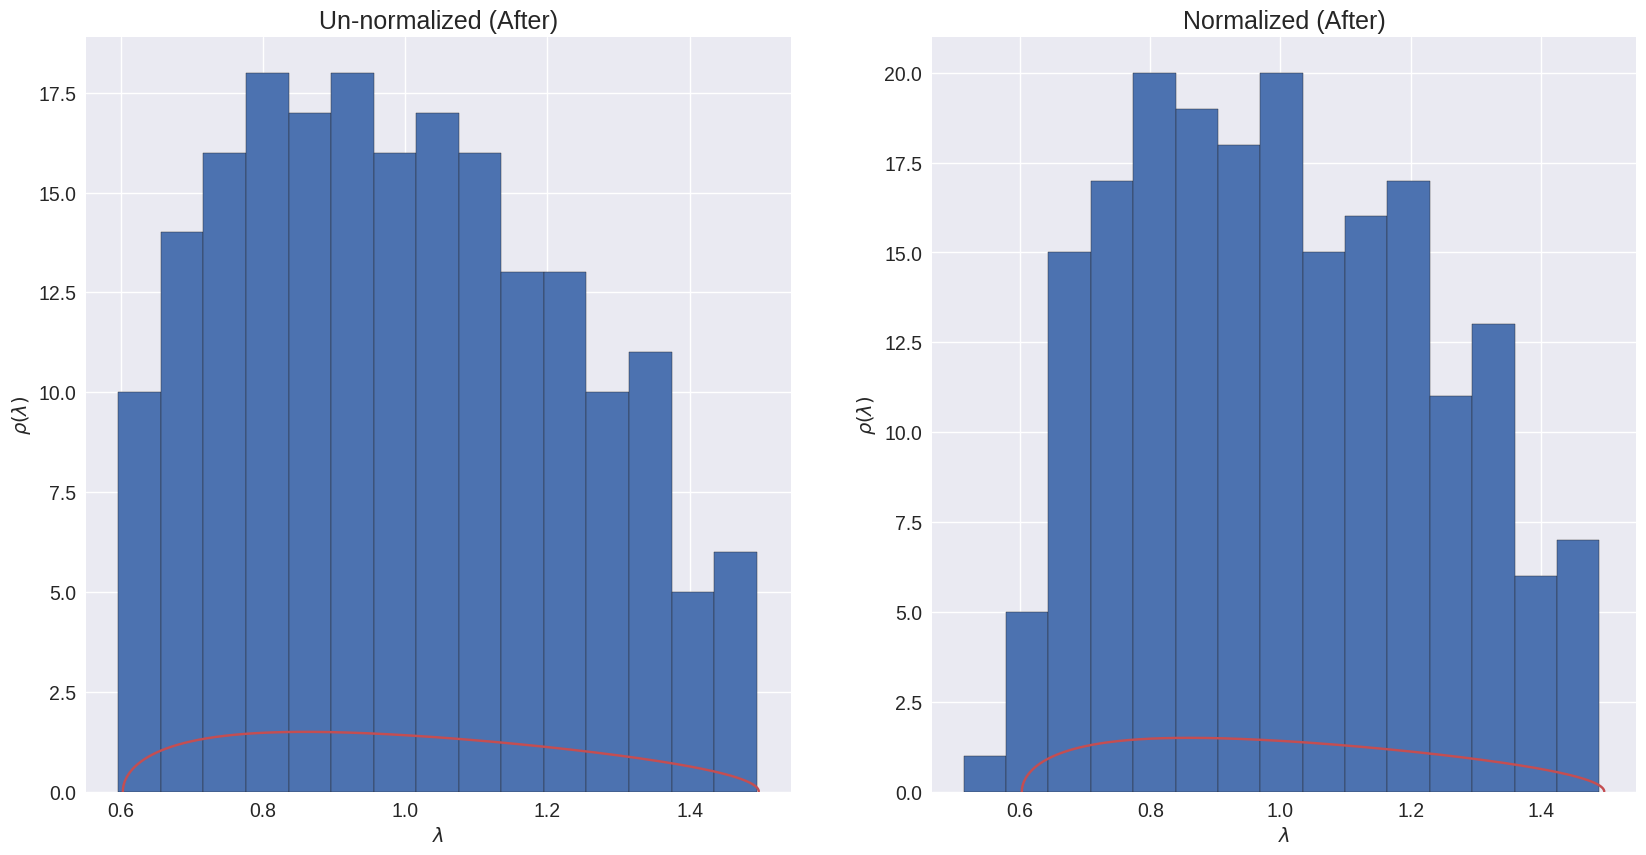

In [494]:
plt.figure(figsize = (20,10), dpi=100)
plt.subplot(121)
x1, y1, _ = plt.hist(w3, bins = 15, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Un-normalized (After)', fontsize = 18)
plt.legend()
plt.subplot(122)
x2, y2, _ = plt.hist(w4, bins=15, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Normalized (After)', fontsize = 18)
plt.legend()

In [495]:
x1

array([10., 14., 16., 18., 17., 18., 16., 17., 16., 13., 13., 10., 11.,
        5.,  6.])

In [496]:
x2

array([ 1.,  5., 15., 17., 20., 19., 18., 20., 15., 16., 17., 11., 13.,
        6.,  7.])

In [497]:
y1

array([0.59641798, 0.65626444, 0.71611089, 0.77595735, 0.8358038 ,
       0.89565026, 0.95549672, 1.01534317, 1.07518963, 1.13503608,
       1.19488254, 1.25472899, 1.31457545, 1.37442191, 1.43426836,
       1.49411482])

In [498]:
y2

array([0.51358527, 0.57864681, 0.64370834, 0.70876987, 0.77383141,
       0.83889294, 0.90395448, 0.96901601, 1.03407755, 1.09913908,
       1.16420062, 1.22926215, 1.29432369, 1.35938522, 1.42444676,
       1.48950829])

In [502]:
l[0]

0.6027864045000421

# Overlap Computation (Onew_gd)

In [8]:
import seaborn as sns


In [7]:
prices_data = np.loadtxt('onewgd_m0/overlaps_1._20._200_gd0')
prices_data.shape

(500, 6)

In [283]:
q = []
nb_runs = 500
N = 200
for i in range(nb_runs):
    for j in range(nb_runs):
        q.append(prices_data[i].dot(prices_data[j]))
q = np.asarray(q)
q = q/N

In [4]:
o1 = np.loadtxt('onewgd_m0/overlaps_1._20._200_gd0').T
o2 = np.loadtxt('onewgd_m0/overlaps_-1._20._200_gd0').T
o3 = np.loadtxt('onewgd_m0.57/overlaps_1._20._200_gd0').T
o4 = np.loadtxt('onewgd_m0.57/overlaps_-1._20._200_gd0').T

In [30]:

# plt.figure(figsize = (20,20), dpi=200)
# plt.subplot(221)
# plt.ticklabel_format(style='plain', axis='x', useOffset = False)
# plt.title('$\\sigma = 1.0$ RS-UNSAT', fontsize=18)
# plt.xlabel('q', fontsize = 14)
# plt.ylabel('$P(q)$', fontsize = 14)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.hist(o1[1], ec="k")
# plt.subplot(222)
# plt.title('$\\sigma = -1.0$ fRSB-UNSAT', fontsize=18)
# plt.xlabel('q', fontsize = 14)
# plt.ylabel('$P(q)$', fontsize = 14)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.hist(o2[1], ec="k")
# plt.subplot(223)
# plt.title('$\\sigma = 1.0$, m = 0.57, RS-UNSAT', fontsize=18)
# plt.xlabel('q', fontsize = 14)
# plt.ylabel('$P(q)$', fontsize = 14)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.hist(o3[1], ec="k")
# plt.subplot(224)
# plt.title('$\\sigma = -1.0$, m = 0.57, fRSB-UNSAT', fontsize=18)
# plt.xlabel('q', fontsize = 14)
# plt.ylabel('$P(q)$', fontsize = 14)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.hist(o4[1], ec="k")
# plt.suptitle('Overlap distribution after R&R procedure', fontsize = 26)
# plt.savefig('overlap_onew_both.pdf')

In [31]:

# plt.figure(figsize = (20,20), dpi=200)
# plt.subplot(221)
# plt.ticklabel_format(style='plain', axis='x', useOffset = False)
# plt.title('$\\sigma = 1.0$ RS-UNSAT', fontsize=18)
# plt.xlabel('q', fontsize = 14)
# plt.ylabel('$P(q)$', fontsize = 14)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.hist(o1[4], ec="k")
# plt.subplot(222)
# plt.title('$\\sigma = -1.0$ fRSB-UNSAT', fontsize=18)
# plt.xlabel('q', fontsize = 14)
# plt.ylabel('$P(q)$', fontsize = 14)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.hist(o2[4], ec="k")
# plt.subplot(223)
# plt.title('$\\sigma = 1.0$, m = 0.57, RS-UNSAT', fontsize=18)
# plt.xlabel('q', fontsize = 14)
# plt.ylabel('$P(q)$', fontsize = 14)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.hist(o3[4], ec="k")
# plt.subplot(224)
# plt.title('$\\sigma = -1.0$, m = 0.57, fRSB-UNSAT', fontsize=18)
# plt.xlabel('q', fontsize = 14)
# plt.ylabel('$P(q)$', fontsize = 14)
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.hist(o4[4], ec="k")
# plt.suptitle('Energy distribution after R&R procedure', fontsize = 26)
# plt.savefig('energy_onew_both.pdf')

# Overlap computation multiple stages

In [8]:
import os
os.chdir('overlap_multiple_stages/')

In [10]:
os.getcwd()

'/Users/dhruv/Documents/phdcode/cpp_implementation/group_meeting_7_feb/overlap_multiple_stages'

In [11]:
prices_before_1 = np.loadtxt('gd_m0/prices_before_1._20._200_1')
prices_before_2 = np.loadtxt('gd_m0/prices_before_-1._20._200_0')
prices_before_3 = np.loadtxt('gd_m0.57/prices_before_1._20._200_1')
prices_before_4 = np.loadtxt('gd_m0.57/prices_before_-1._20._200_0')

prices_after_1 = np.loadtxt('gd_m0/prices_after_1._20._200_1')
prices_after_2 = np.loadtxt('gd_m0/prices_after_-1._20._200_0')
prices_after_3 = np.loadtxt('gd_m0.57/prices_after_1._20._200_1')
prices_after_4 = np.loadtxt('gd_m0.57/prices_after_-1._20._200_0')


prices_during_1 = np.loadtxt('gd_m0/prices_during_1._20._200_1')
prices_during_2 = np.loadtxt('gd_m0/prices_during_-1._20._200_0')
prices_during_3 = np.loadtxt('gd_m0.57/prices_during_1._20._200_1')
prices_during_4 = np.loadtxt('gd_m0.57/prices_during_-1._20._200_0')

o_before_1 = np.loadtxt('gd_m0/overlaps_before_1._20._200_1').T
o_before_2 = np.loadtxt('gd_m0/overlaps_before_-1._20._200_0').T
o_before_3 = np.loadtxt('gd_m0.57/overlaps_before_1._20._200_1').T
o_before_4 = np.loadtxt('gd_m0.57/overlaps_before_-1._20._200_0').T

o_after_1 = np.loadtxt('gd_m0/overlaps_after_1._20._200_1').T
o_after_2 = np.loadtxt('gd_m0/overlaps_after_-1._20._200_0').T
o_after_3 = np.loadtxt('gd_m0.57/overlaps_after_1._20._200_1').T
o_after_4 = np.loadtxt('gd_m0.57/overlaps_after_-1._20._200_0').T

In [12]:
def compute_q(prices_data):
    q = []
    nb_runs = 500
    N = 200
    for i in range(nb_runs):
        for j in range(i,nb_runs):
            q.append(prices_data[i].dot(prices_data[j]))
    q = np.asarray(q)
    q = q/N
    return q

In [13]:
q1 = compute_q(prices_before_1)
q2 = compute_q(prices_before_2)
q3 = compute_q(prices_before_3)
q4 = compute_q(prices_before_4)


In [15]:
plt.style.use('seaborn')

In [16]:
q5 = compute_q(prices_after_1)
q6 = compute_q(prices_after_3)
plt.subplot(121)
plt.hist(q3, ec="k")
plt.subplot(122)
plt.hist(q6, ec="k")

(array([1.23753e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.46000e+02,
        1.04500e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([0.98999962, 0.99009098, 0.99018234, 0.9902737 , 0.99036506,
        0.99045642, 0.99054778, 0.99063914, 0.9907305 , 0.99082186,
        0.99091322]),
 <a list of 10 Patch objects>)

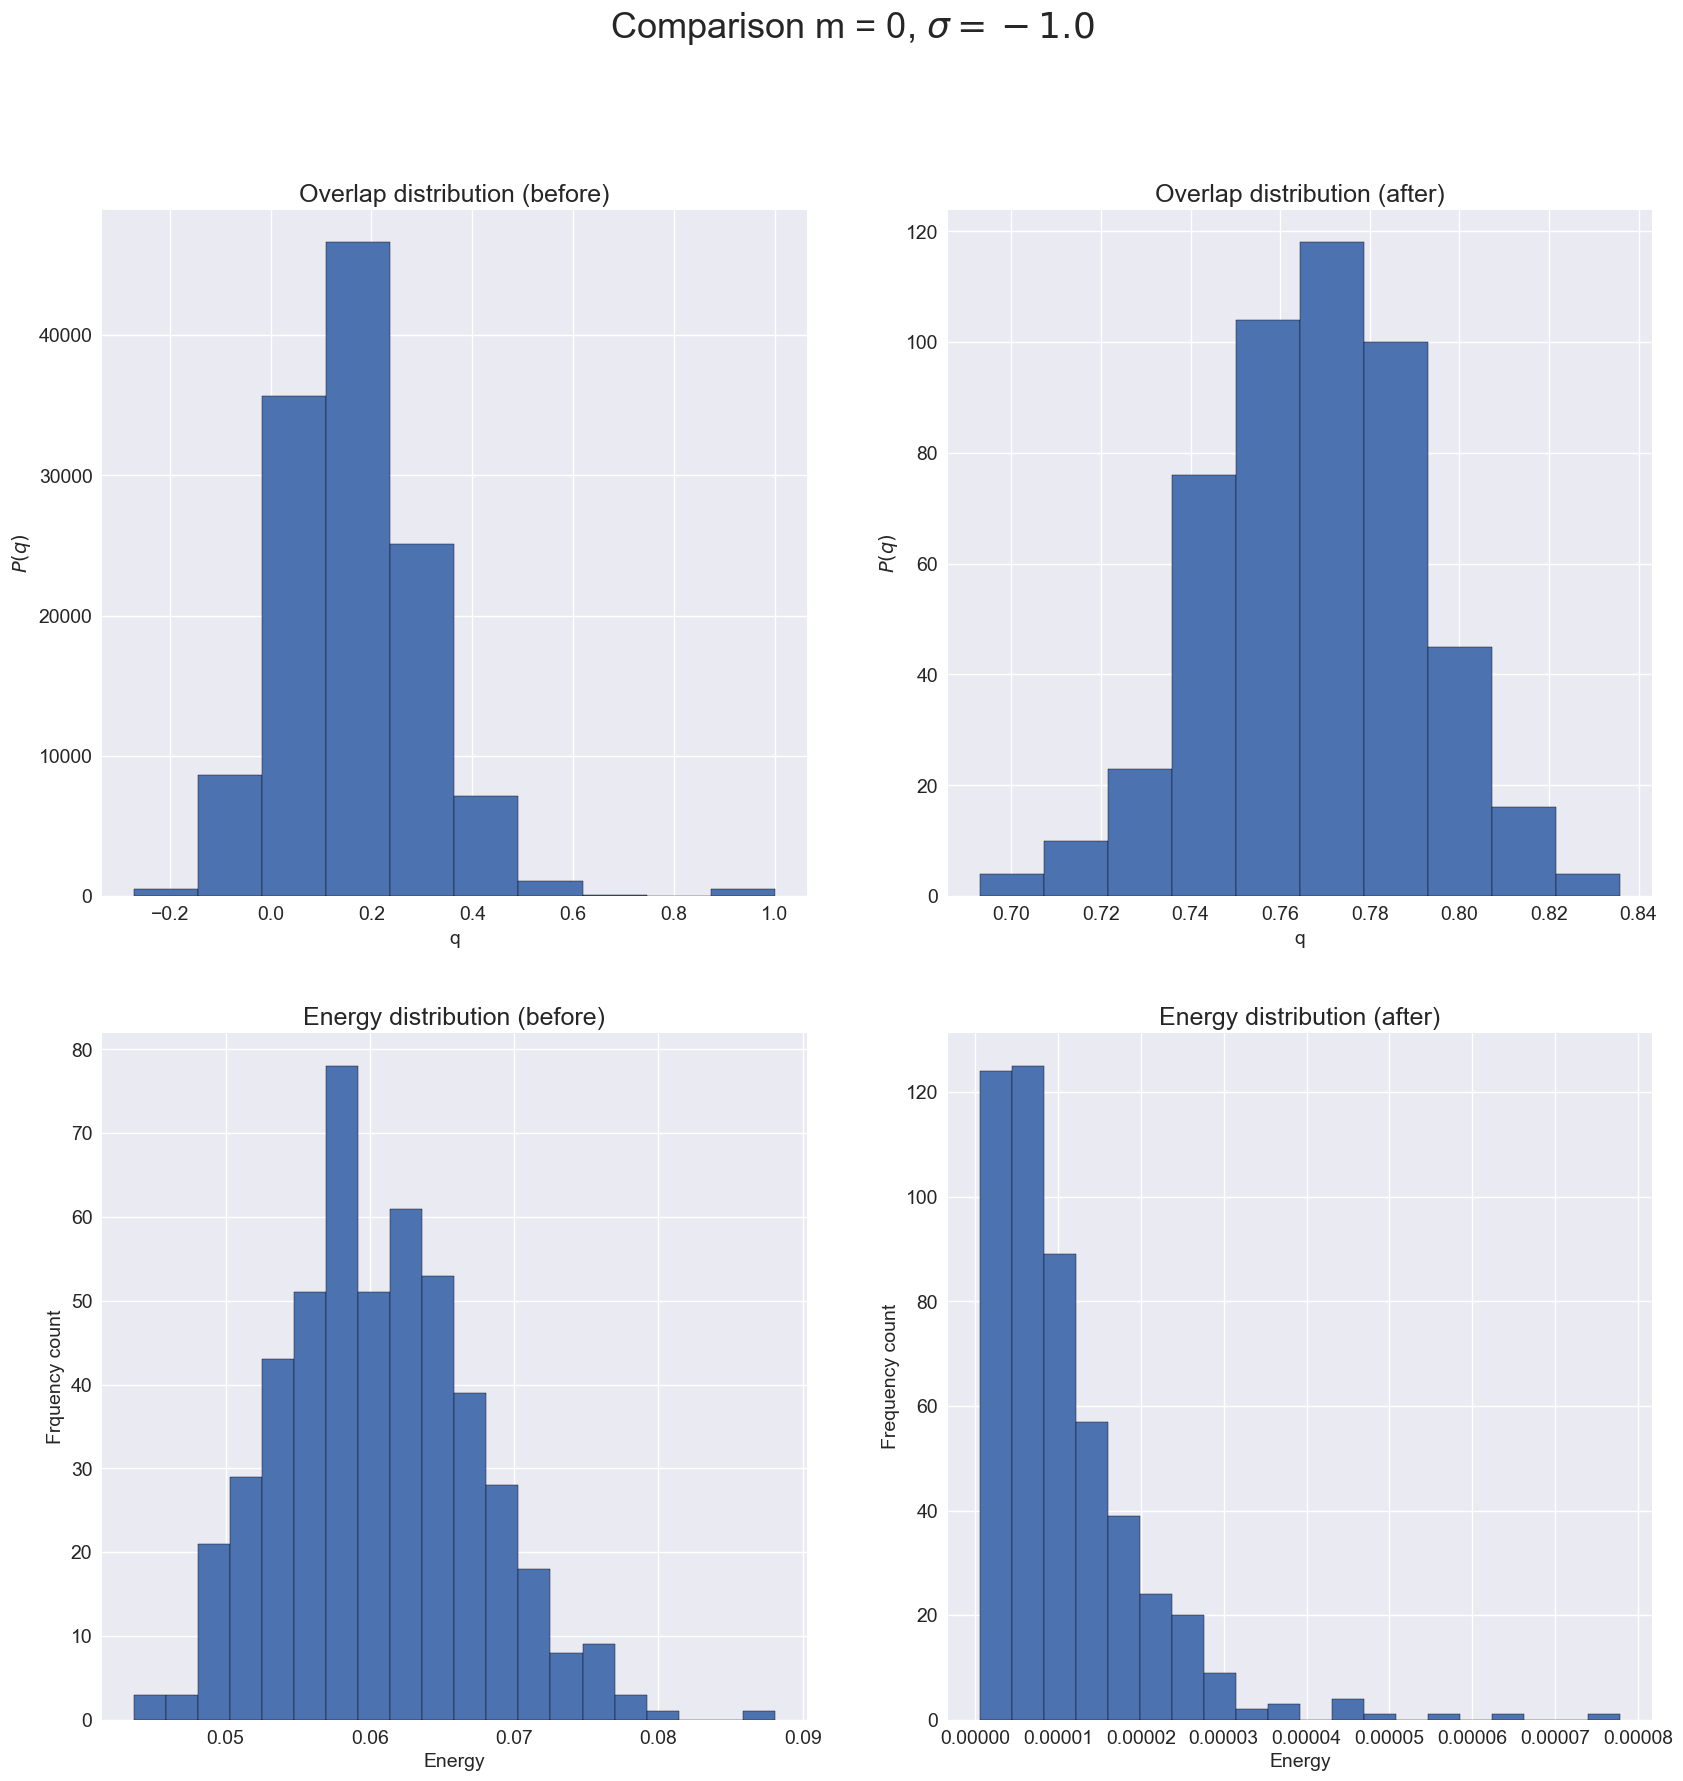

In [29]:
plt.figure(figsize = (20,20), dpi = 100)
plt.subplot(221)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (before)', fontsize = 18)
plt.hist(q2, ec = "k", )
plt.subplot(222)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (after)', fontsize = 18)
plt.hist(o_after_2[1], ec = "k", )
plt.subplot(223)
plt.xlabel('Energy', fontsize = 14)
plt.ylabel('Frquency count', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Energy distribution (before)', fontsize = 18)
plt.hist(o_before_2[3], ec = "k", bins = 20)
plt.subplot(224)
plt.xlabel('Energy', fontsize = 14)
plt.ylabel('Frequency count', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ticklabel_format(style='sci', axis='x')
plt.title('Energy distribution (after)', fontsize = 18)
x1, y1, _ = plt.hist(o_after_2[4], ec = "k",bins=20)
plt.suptitle('Comparison m = 0, $\\sigma = -1.0$', fontsize = 26)
plt.savefig('plots/o_and_e_m_0_-1_bis.pdf')
plt.savefig('plots/o_and_e_m_0_-1_bis.png')

In [22]:
y1

array([5.54870000e-07, 3.13062433e-06, 5.70637867e-06, 8.28213300e-06,
       1.08578873e-05, 1.34336417e-05, 1.60093960e-05, 1.85851503e-05,
       2.11609047e-05, 2.37366590e-05, 2.63124133e-05, 2.88881677e-05,
       3.14639220e-05, 3.40396763e-05, 3.66154307e-05, 3.91911850e-05,
       4.17669393e-05, 4.43426937e-05, 4.69184480e-05, 4.94942023e-05,
       5.20699567e-05, 5.46457110e-05, 5.72214653e-05, 5.97972197e-05,
       6.23729740e-05, 6.49487283e-05, 6.75244827e-05, 7.01002370e-05,
       7.26759913e-05, 7.52517457e-05, 7.78275000e-05])

In [513]:
y1

array([5.5487000e-07, 8.2821330e-06, 1.6009396e-05, 2.3736659e-05,
       3.1463922e-05, 3.9191185e-05, 4.6918448e-05, 5.4645711e-05,
       6.2372974e-05, 7.0100237e-05, 7.7827500e-05])

Text(0.5,0.98,u'Comparison m = 0, $\\sigma = 1.0$')

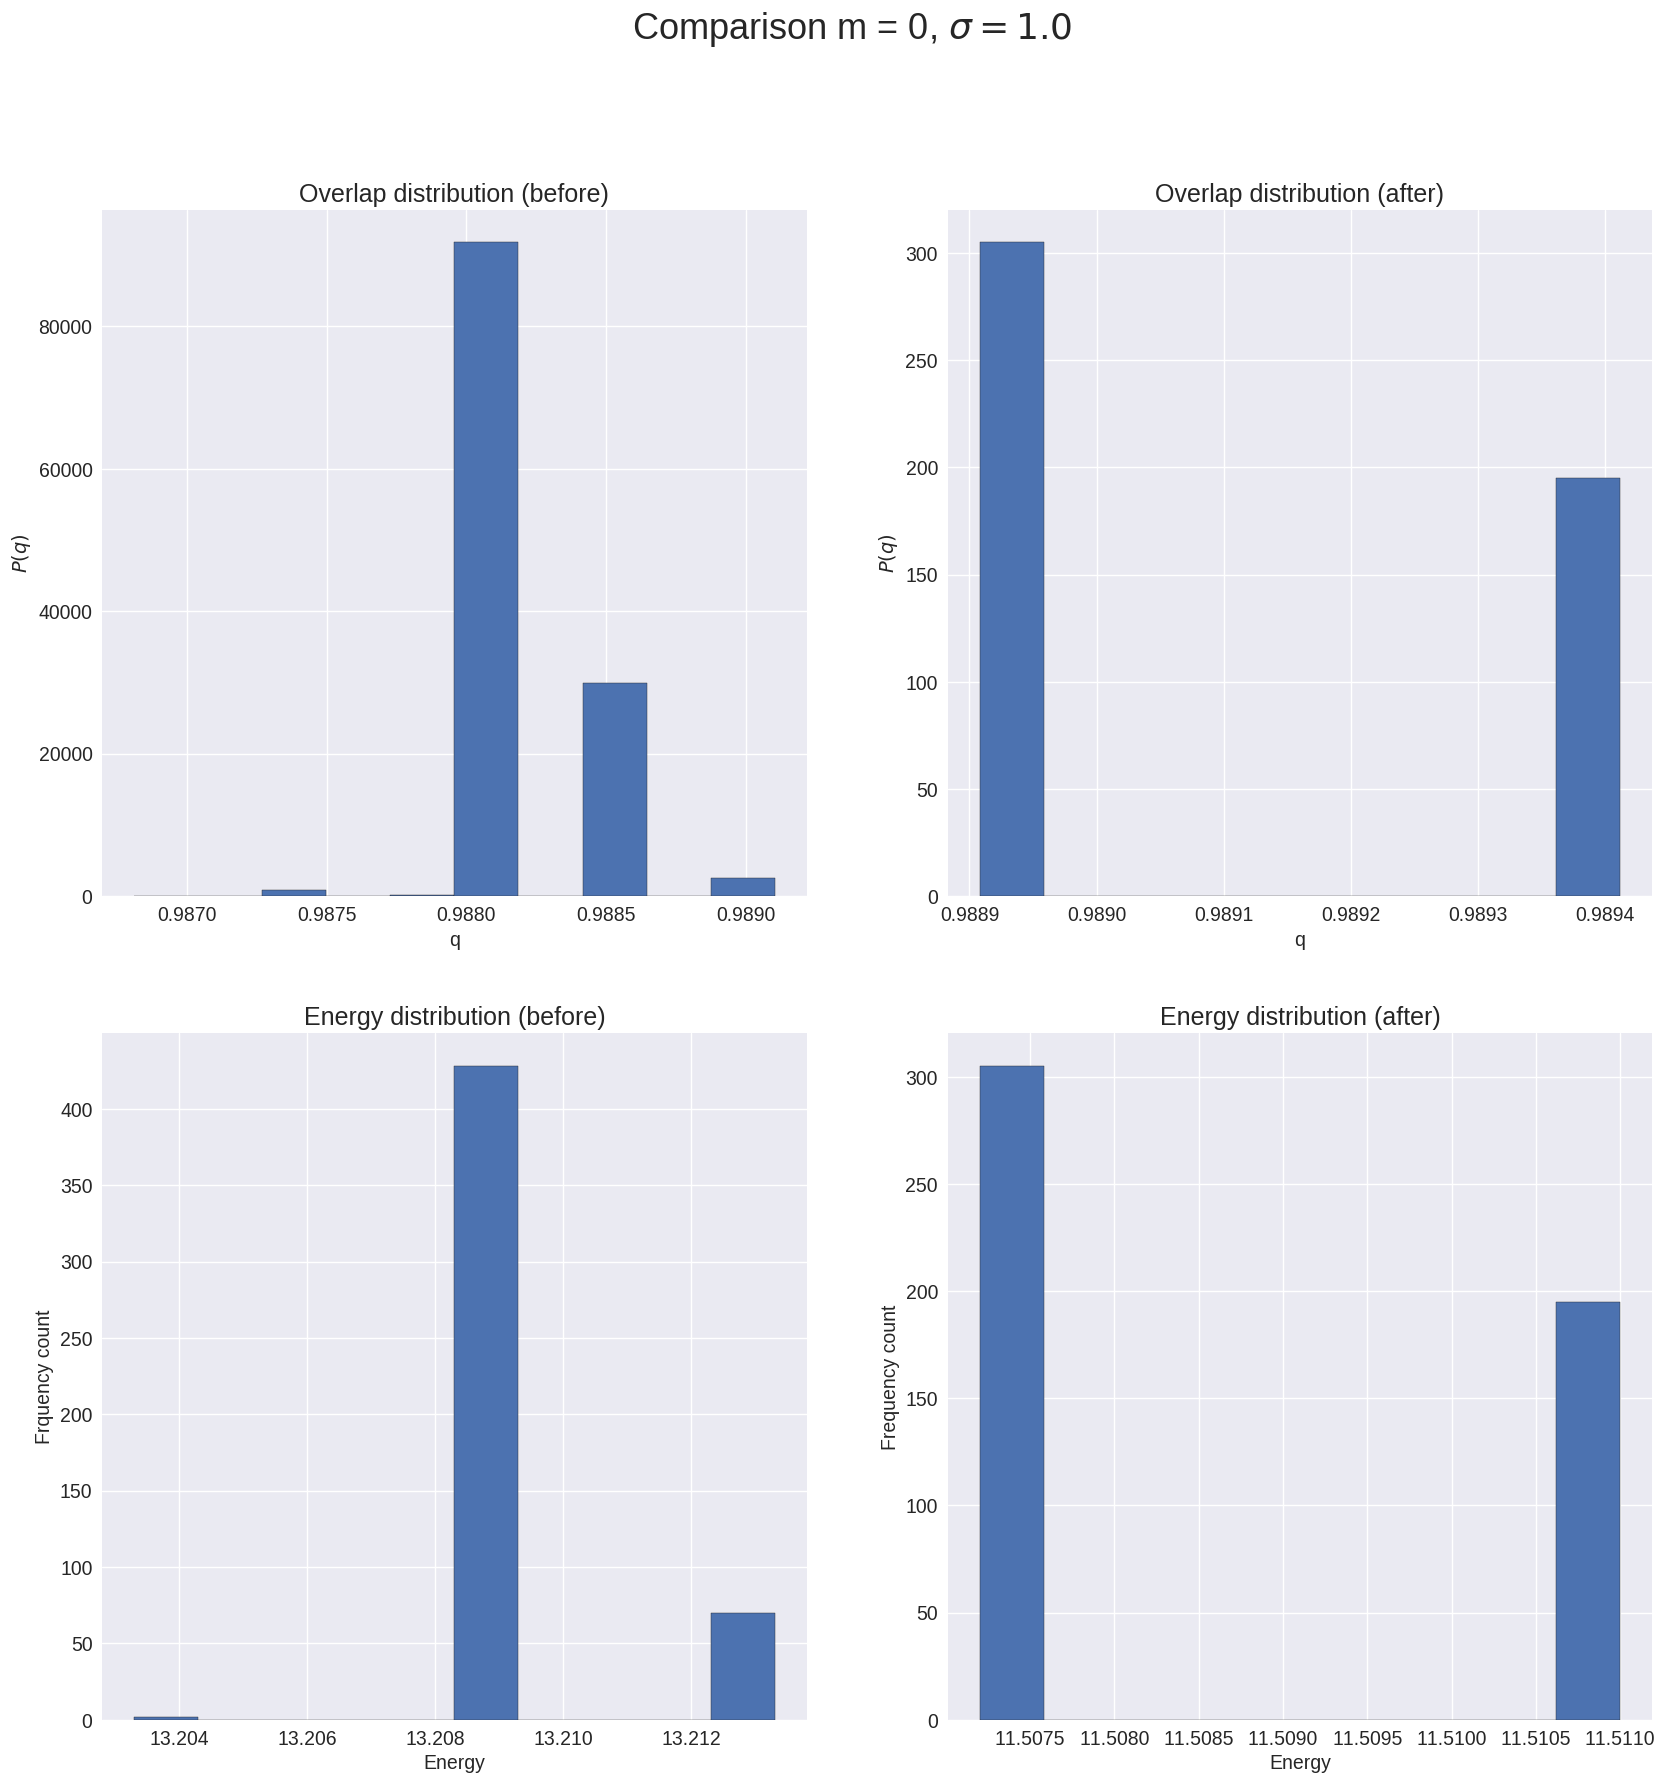

In [478]:
plt.figure(figsize = (20,20), dpi = 100)
plt.subplot(221)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (before)', fontsize = 18)
plt.hist(q1, ec = "k", )
plt.subplot(222)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (after)', fontsize = 18)
plt.hist(o_after_1[1], ec = "k",)
plt.subplot(223)
plt.xlabel('Energy', fontsize = 14)
plt.ylabel('Frquency count', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Energy distribution (before)', fontsize = 18)
plt.hist(o_before_1[3], ec = "k", )
plt.subplot(224)
plt.xlabel('Energy', fontsize = 14)
plt.ylabel('Frequency count', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ticklabel_format(style='plain', axis='x', useOffset = False)
plt.title('Energy distribution (after)', fontsize = 18)
plt.hist(o_after_1[4], ec = "k",)
plt.suptitle('Comparison m = 0, $\\sigma = 1.0$', fontsize = 26)

In [479]:
plt.figure(figsize = (20,20), dpi = 100)
plt.subplot(221)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (before)', fontsize = 18)
plt.hist(q3, ec = "k", )
plt.subplot(222)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (after)', fontsize = 18)
plt.hist(o_after_3[1], ec = "k",)
plt.subplot(223)
plt.xlabel('Energy', fontsize = 14)
plt.ylabel('Frquency count', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Energy distribution (before)', fontsize = 18)
plt.hist(o_before_3[3], ec = "k", )
plt.subplot(224)
plt.xlabel('Energy', fontsize = 14)
plt.ylabel('Frequency count', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ticklabel_format(style='plain', axis='x', useOffset = False)
plt.title('Energy distribution (after)', fontsize = 18)
plt.hist(o_after_3[4], ec = "k",)
plt.suptitle('Comparison m = 0.57, $\\sigma = 1.0$', fontsize = 26)
# plt.savefig('plots/o_and_e_m_0.57_1.pdf')
# plt.savefig('plots/o_and_e_m_0.57_1.png')

Text(0.5,0.98,u'Comparison m = 0.57, $\\sigma = 1.0$')

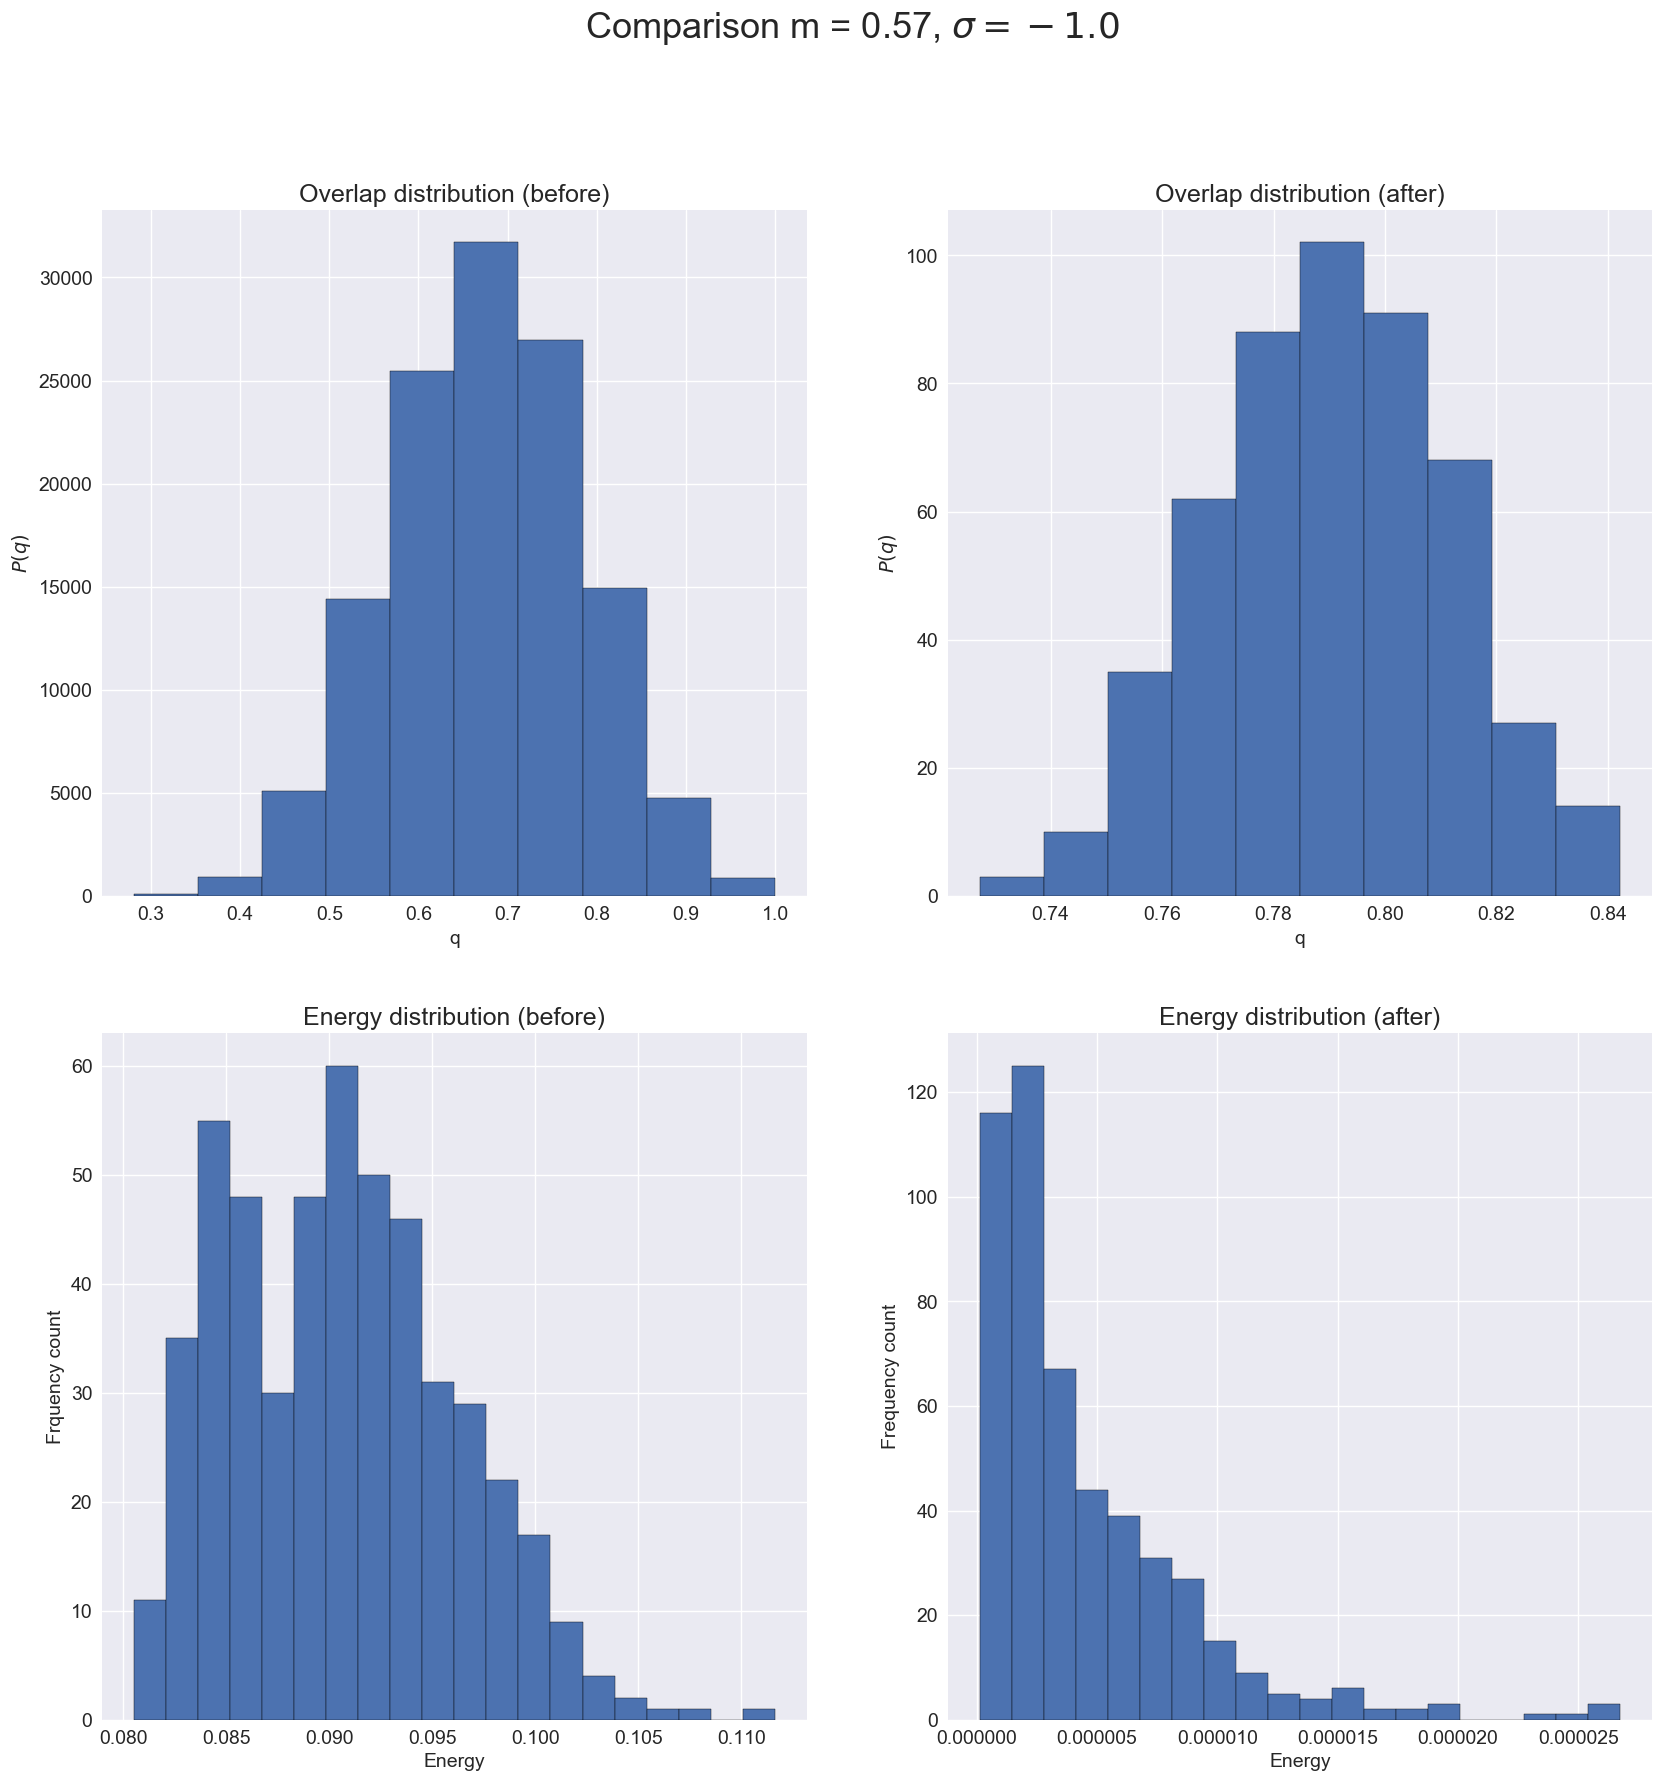

In [31]:
plt.figure(figsize = (20,20), dpi = 100)
plt.subplot(221)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (before)', fontsize = 18)
plt.hist(q4, ec = "k", )
plt.subplot(222)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (after)', fontsize = 18)
plt.hist(o_after_4[1], ec = "k",)
plt.subplot(223)
plt.xlabel('Energy', fontsize = 14)
plt.ylabel('Frquency count', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Energy distribution (before)', fontsize = 18)
plt.hist(o_before_4[3], ec = "k", bins=20)
plt.subplot(224)
plt.xlabel('Energy', fontsize = 14)
plt.ylabel('Frequency count', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ticklabel_format(style='sci', axis='x')
plt.title('Energy distribution (after)', fontsize = 18)
x1, y1, _ = plt.hist(o_after_4[4], ec = "k",bins=20)
plt.suptitle('Comparison m = 0.57, $\\sigma = -1.0$', fontsize = 26)
plt.savefig('plots/o_and_e_m_0.57_-1_bis.pdf')
plt.savefig('plots/o_and_e_m_0.57_-1_bis.png')

In [26]:
y1

array([1.22754000e-07, 1.00970553e-06, 1.89665707e-06, 2.78360860e-06,
       3.67056013e-06, 4.55751167e-06, 5.44446320e-06, 6.33141473e-06,
       7.21836627e-06, 8.10531780e-06, 8.99226933e-06, 9.87922087e-06,
       1.07661724e-05, 1.16531239e-05, 1.25400755e-05, 1.34270270e-05,
       1.43139785e-05, 1.52009301e-05, 1.60878816e-05, 1.69748331e-05,
       1.78617847e-05, 1.87487362e-05, 1.96356877e-05, 2.05226393e-05,
       2.14095908e-05, 2.22965423e-05, 2.31834939e-05, 2.40704454e-05,
       2.49573969e-05, 2.58443485e-05, 2.67313000e-05])

## Comparison of overlap distributions

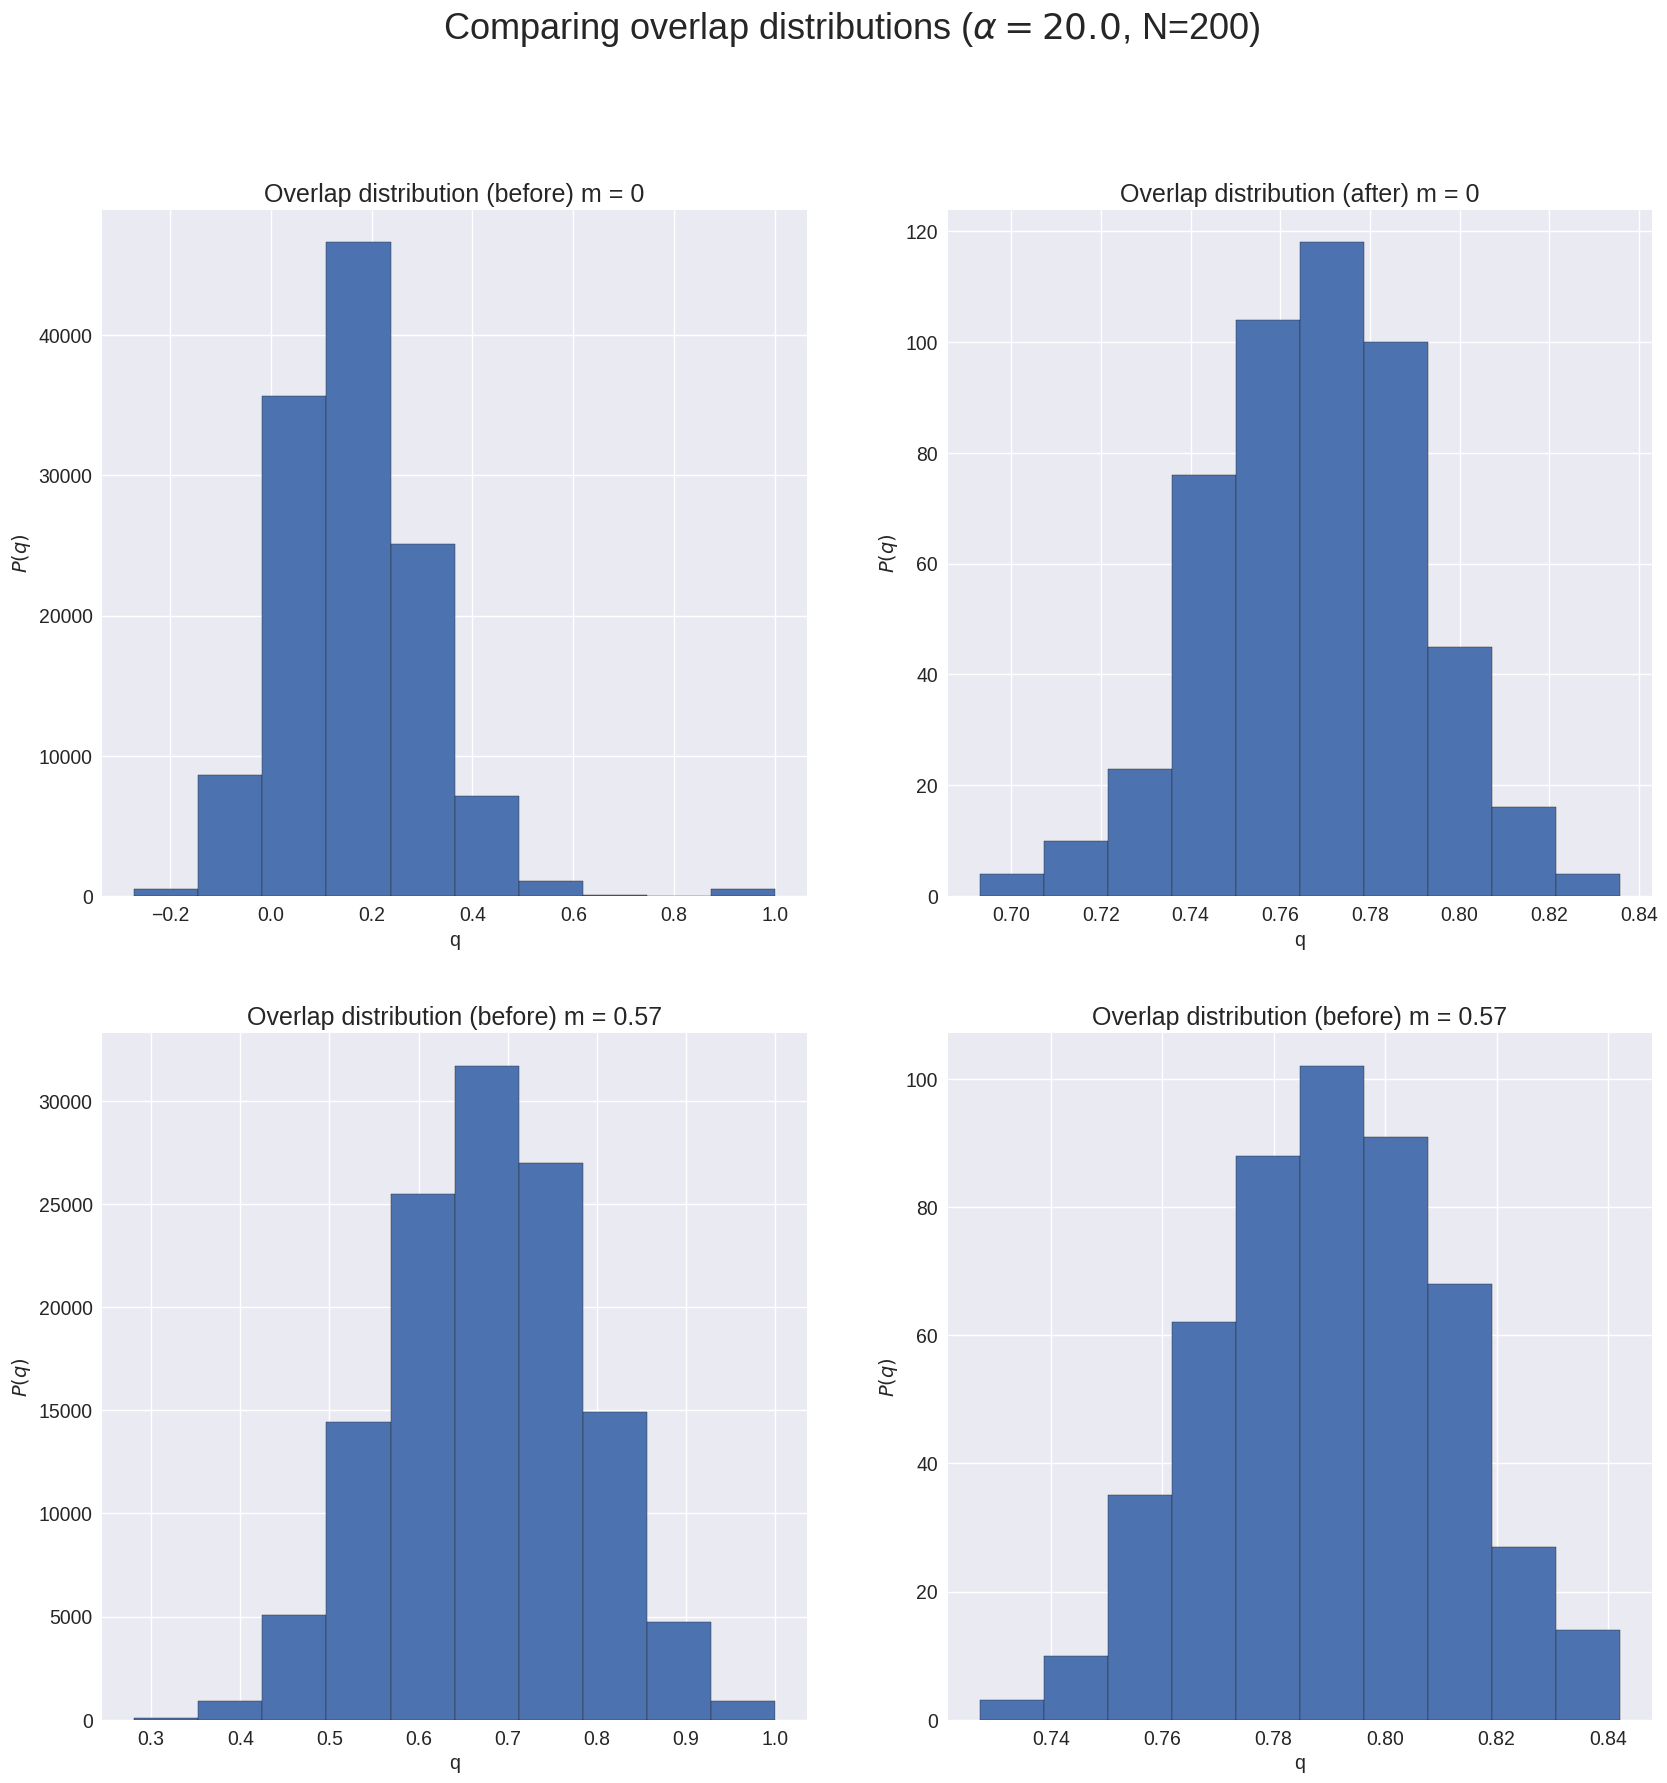

In [17]:
plt.figure(figsize = (20,20), dpi = 100)
plt.subplot(221)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (before) m = 0', fontsize = 18)
plt.hist(q2,  ec = "k", )
plt.subplot(222)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (after) m = 0', fontsize = 18)
plt.hist(o_after_2[1], ec = "k",)
plt.subplot(223)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Overlap distribution (before) m = 0.57', fontsize = 18)
plt.hist(q4, ec = "k", )
plt.subplot(224)
plt.xlabel('q', fontsize = 14)
plt.ylabel('$P(q)$', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ticklabel_format(style='plain', axis='x', useOffset = False)
plt.title('Overlap distribution (before) m = 0.57', fontsize = 18)
plt.hist(o_after_4[1], ec = "k",)
plt.suptitle('Comparing overlap distributions ($\\alpha = 20.0$, N=200)', fontsize = 26)
plt.savefig('plots/comparing_overlaps_all.pdf')
plt.savefig('plots/comparing_overlaps_all.png')

## Eigenvalue spectrum 

In [400]:
xi = np.loadtxt('gd_m0.57/xi_matrix_-1._20._200_0')
print xi.shape

(8000, 200)


In [401]:
i=1
xi_before = xi[:4000]
xi_after = xi[4000:]
print xi_after.shape

(4000, 200)


In [402]:
w1 = compute_evals(xi_before)
w2 = compute_evals(normalize_matrix(xi_before))
w3 = compute_evals(xi_after)
w4 = compute_evals(normalize_matrix(xi_after))

/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Text(0.5,0.98,u'm = 0, $\\alpha = 20.0$, $\\sigma$ = 1.0')

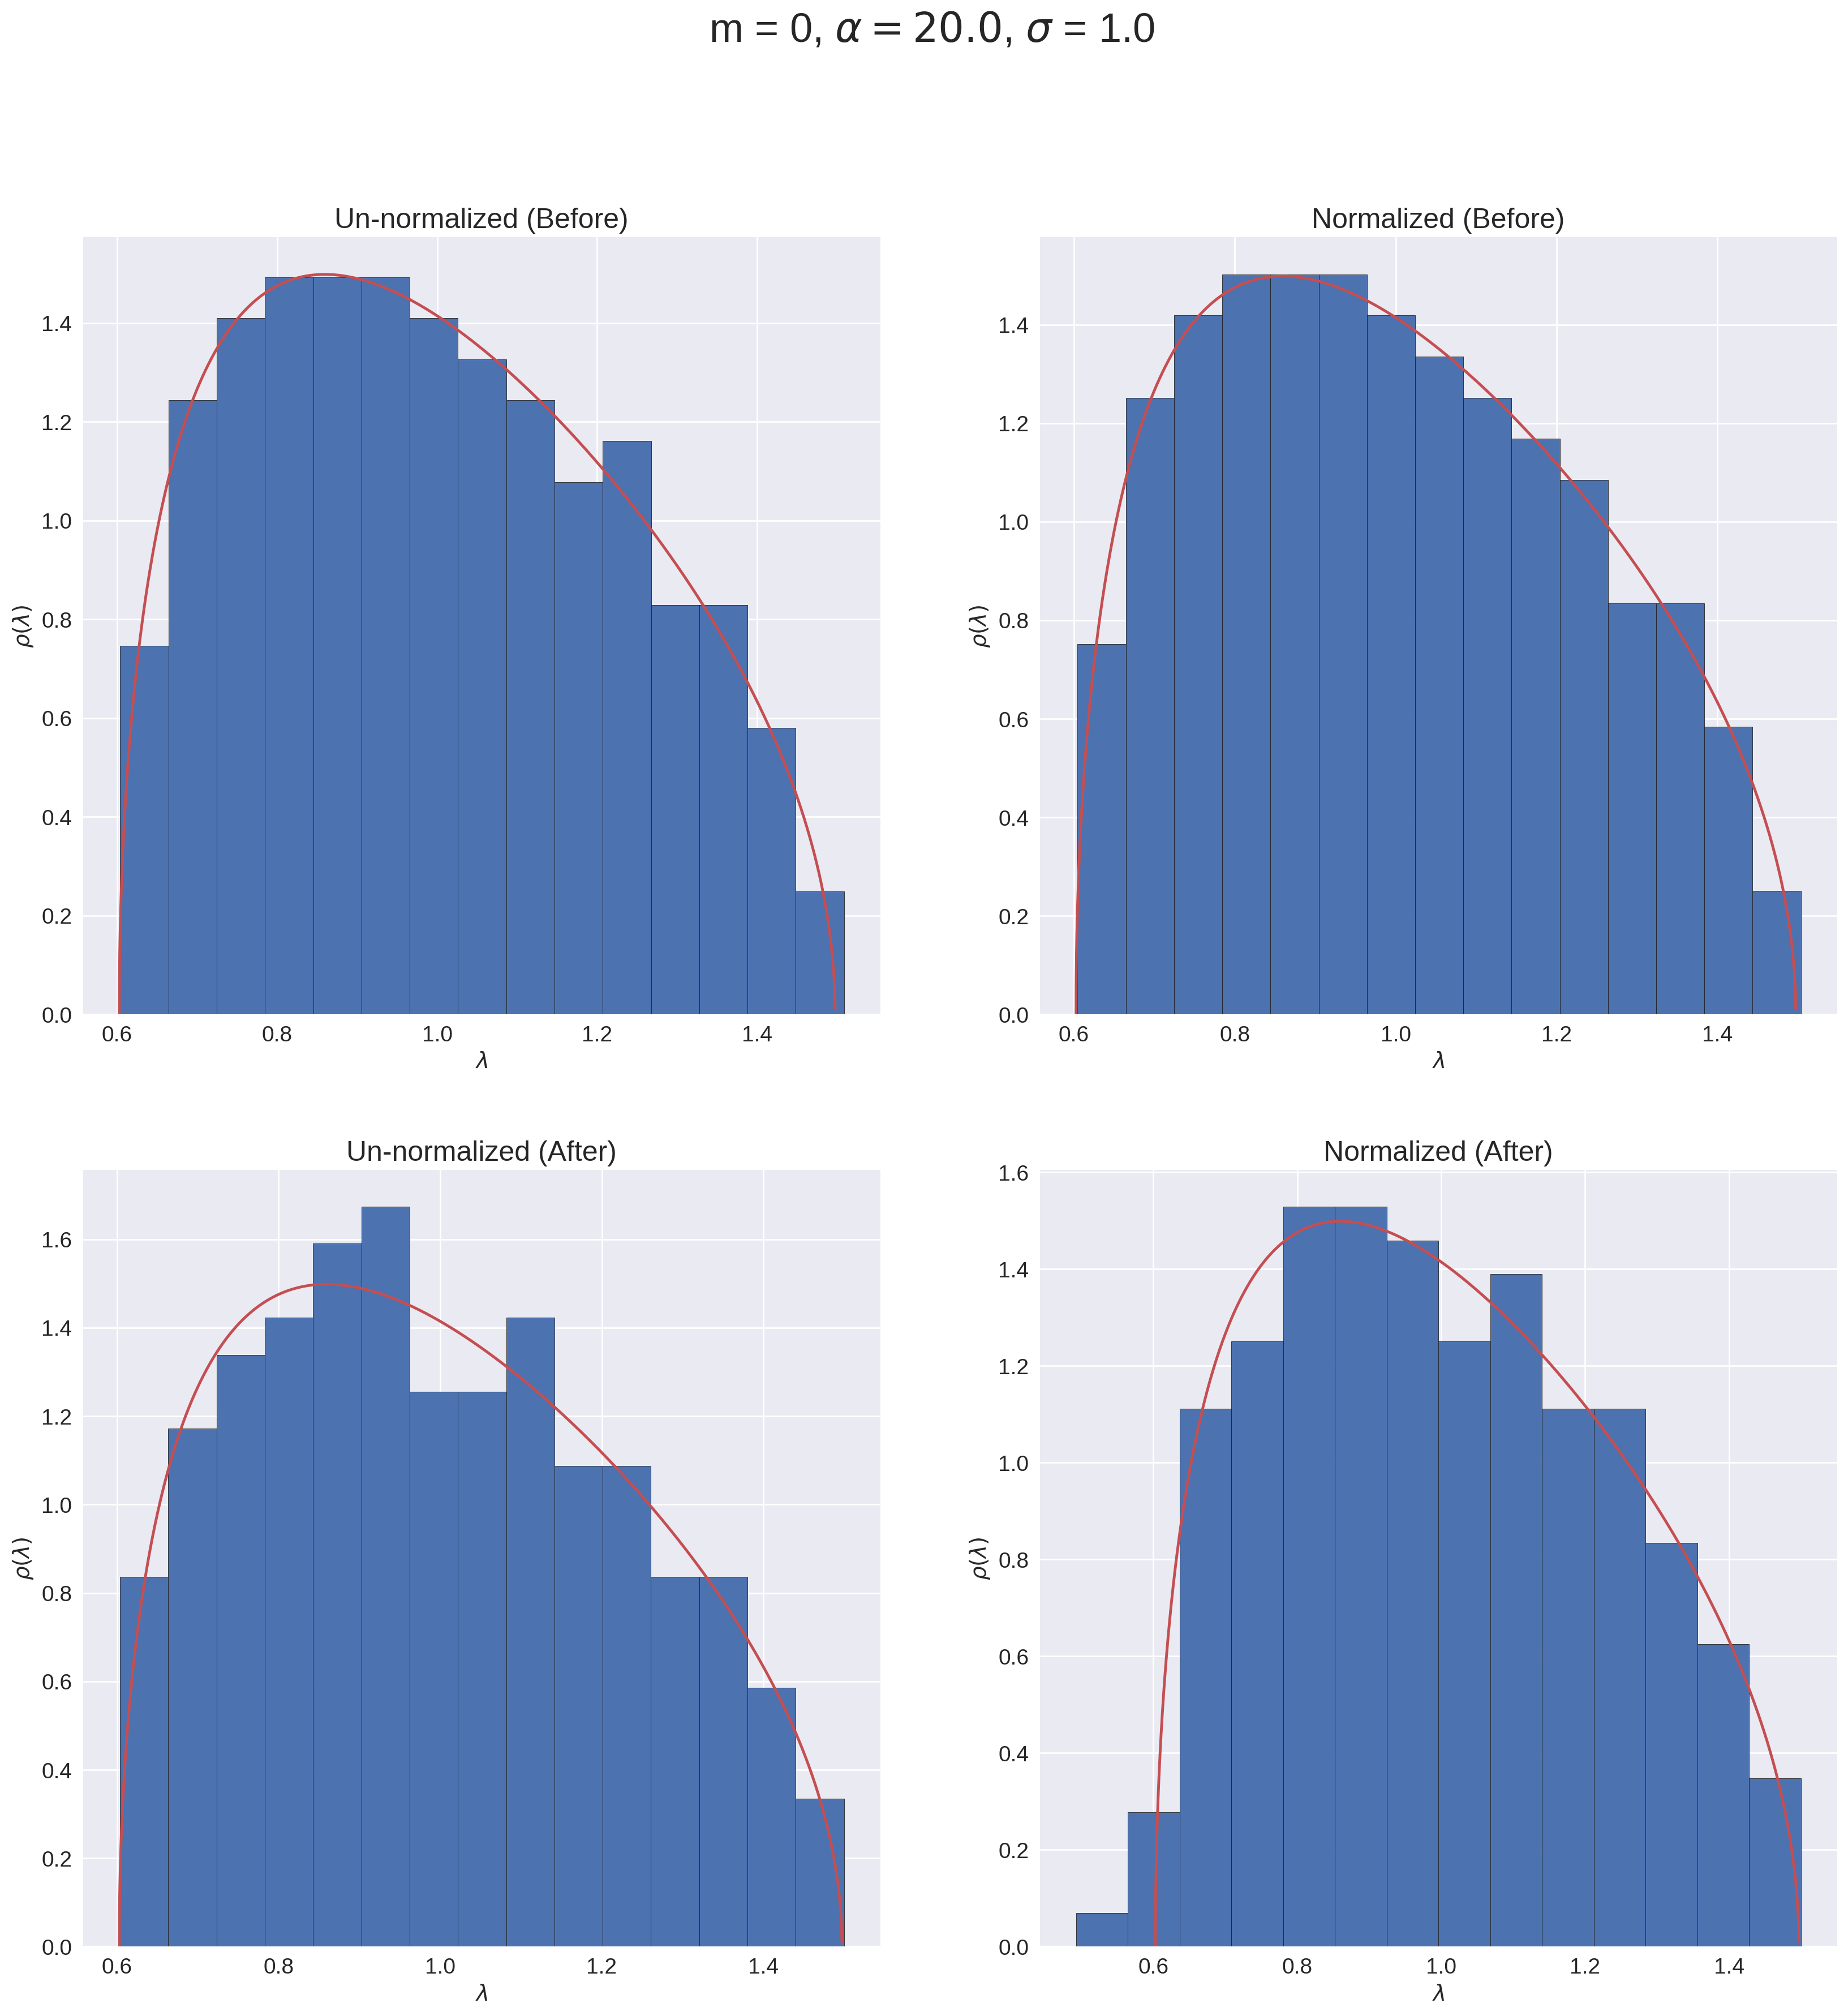

In [411]:
plt.figure(figsize = (20,20), dpi = 200)
l,m = mplaw(20)
plt.subplot(221)
plt.hist(w1,density = True, ec="k", bins=15)
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Un-normalized (Before)', fontsize = 18)
plt.legend()
plt.subplot(222)
plt.hist(w2, density=True , ec="k", bins = 15)
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Normalized (Before)', fontsize = 18)
plt.legend()
plt.subplot(223)
x1, y1, _ = plt.hist(w3, density = True,  ec="k", bins=15)
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Un-normalized (After)', fontsize = 18)
plt.legend()
plt.subplot(224)
x2, y2, _ = plt.hist(w4, density = True,   ec="k", bins=int(np.sqrt(200)))
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('Normalized (After)', fontsize = 18)
plt.legend()
plt.suptitle('m = {}, $\\alpha = 20.0$, $\\sigma$ = {}'.format(0,sigma), fontsize = 26)

In [412]:
x2, y2, _= plt.hist(w3, bins=int(np.sqrt(200)))
x3, y3, _ = plt.hist(w4, bins=int(np.sqrt(200)))

In [413]:
y2

array([0.60369067, 0.66770263, 0.73171458, 0.79572654, 0.85973849,
       0.92375045, 0.9877624 , 1.05177436, 1.11578631, 1.17979827,
       1.24381022, 1.30782218, 1.37183413, 1.43584609, 1.49985804])

In [414]:
y3

array([0.49251248, 0.56447404, 0.6364356 , 0.70839717, 0.78035873,
       0.8523203 , 0.92428186, 0.99624343, 1.06820499, 1.14016655,
       1.21212812, 1.28408968, 1.35605125, 1.42801281, 1.49997438])

In [415]:
x2

array([11., 15., 18., 19., 21., 18., 17., 16., 17., 12., 13., 10.,  9.,
        4.])

In [416]:
x3

array([ 1.,  4., 16., 18., 22., 22., 21., 18., 20., 16., 16., 12.,  9.,
        5.])

## PCA testing

In [434]:
import sklearn.decomposition as deco
from mpl_toolkits.mplot3d import Axes3D

In [470]:
xib = normalize_matrix(xi_before)
xia = normalize_matrix(xi_after)
cb = xib.T.dot(xib)
cb = cb/xib.shape[0]
ca = xia.T.dot(xia)
ca = ca/xia.shape[0]


In [471]:
pca = deco.PCA(n_components=2)
ica = deco.FastICA(random_state=np.random.RandomState(42))
xia_pca = pca.fit(ca).transform(ca)
xia_ica = ica.fit(ca).transform(ca)

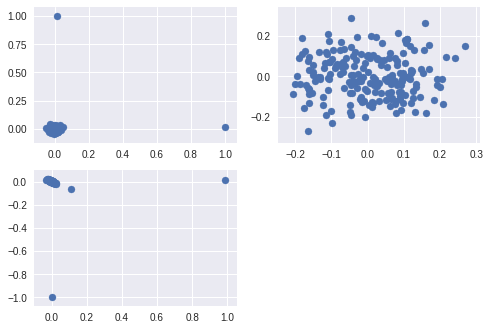

In [472]:
plt.subplot(221)
plt.scatter(ca[:, 0], ca[:, 1])
plt.subplot(222)
plt.scatter(xia_pca[:,0], xia_pca[:,1])
plt.subplot(223)
plt.scatter(xia_ica[:,0], xia_ica[:,1])

In [430]:
print ('explained variance (first %d components): %.2f'%(1, sum(pca.explained_variance_ratio_)))

explained variance (first 1 components): 1.00


# RAR procedure results 

In [120]:
rar_1 = np.loadtxt('gd_m0/rar_1._20._200_0').T 
rar_2 = np.loadtxt('gd_m0/rar_-1._20._200_0').T

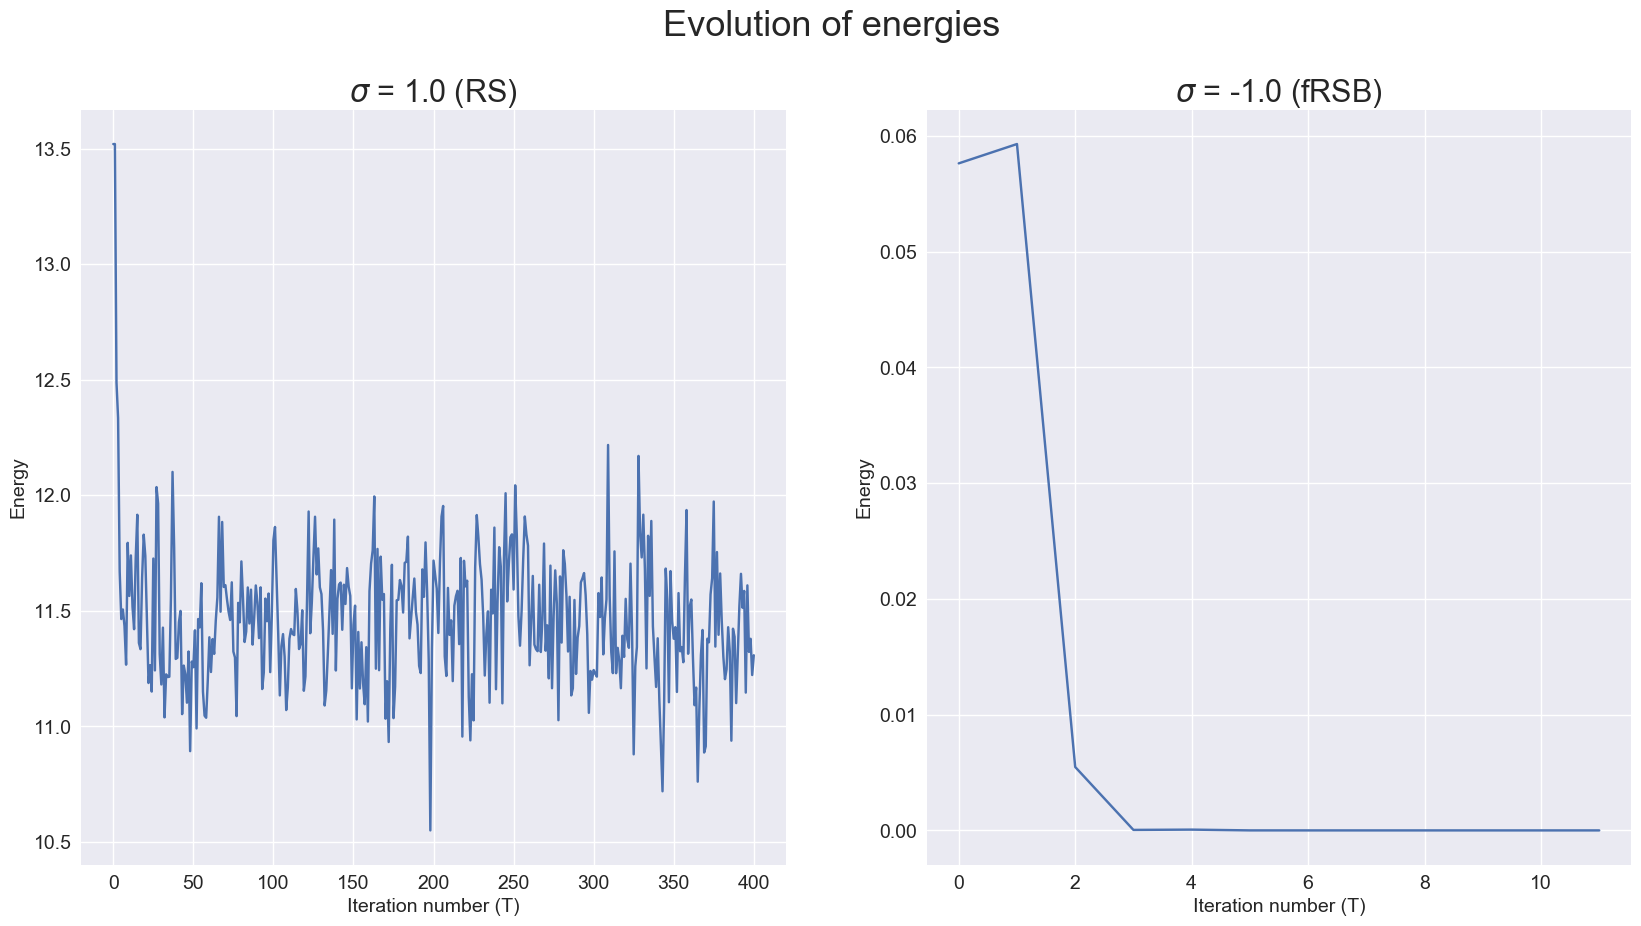

In [134]:
plt.figure(figsize = (20,10), dpi=100)
plt.subplot(121)
plt.title('$\sigma$ = 1.0 (RS)', fontsize = 22)
plt.xlabel('Iteration number (T)', fontsize = 14)
plt.ylabel('Energy', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(rar_1[0], rar_1[3])
plt.subplot(122)
plt.title('$\sigma$ = -1.0 (fRSB)', fontsize = 22)
plt.xlabel('Iteration number (T)', fontsize = 14)
plt.ylabel('Energy', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(rar_2[0], rar_2[3])
plt.suptitle('Evolution of energies', fontsize = 26)
plt.savefig('plots/rar_evolution.png')
plt.savefig('plots/rar_evolution.pdf')

# Overlap Computation 

In [7]:
import seaborn as sns

In [14]:
data_overlaps_pos = np.loadtxt('overlap_m0.57/overlaps_1._20._200_0').T
data_overlaps_neg = np.loadtxt('overlap_m0.57/overlaps_-1._20._200_0').T

In [15]:
weights = np.ones_like(data_overlaps_pos[2])/np.size(data_overlaps_pos[2])

In [16]:
def plot_overlap(data_file,m, sigma, save_name):
    data = np.loadtxt(data_file).T
    weights = np.ones_like(data[1])/np.size(data[1])
    plt.figure(figsize=(10,10), dpi=100)
    # plt.hist(data_overlaps_pos[1], weights=weights, label='sigma=1.')
    plt.hist(data[1], weights=weights, label = 'sigma = {}'.format(sigma))
    
#     sns.kdeplot(data[1], label= 'Density')
    plt.title('Overlap distribution: m={}, $\\alpha$ = 20.0, N = 200'.format(m))
    plt.ylabel('Frequency')
    plt.xlabel('q')
    plt.legend()
    plt.savefig(save_name)

In [17]:
plot_overlap('overlap_m0.57/overlaps_-1._20._200_0', 0.57, -1.0, 'overlap_m0.57/sigma_-1_test.pdf')

In [64]:
data1 = np.loadtxt('overlap_m0.57/overlaps_1._20._200_0').T
data2 = np.loadtxt('overlap_m0.57/overlaps_-1._20._200_0').T

In [65]:
w = np.ones_like(data1[1])/np.size(data1[1])
m=0.57
plt.figure(figsize=(12,8), dpi=100)

plt.subplot(121)
plt.title('$\\sigma$ = 1.0')
plt.hist(data1[1], weights = w)
plt.xlabel('q')
plt.subplot(122)
plt.title('$\\sigma$ = -1.0')
plt.xlabel('q')
plt.hist(data2[1], weights = w)

plt.suptitle('m={}, $\\alpha$ = 20.0, N = 200'.format(m))
plt.savefig('overlap_m0.57/overlap_m057.png')

In [46]:
norm_data = (data1[1] - np.min(data1[1]))/(np.max(data1[1]) - np.min(data1[1]))
sns.distplot(norm_data)

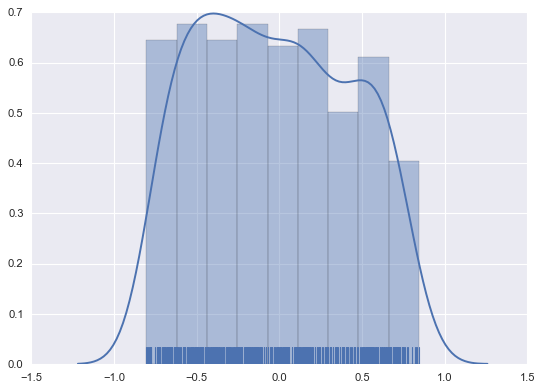

In [52]:
sns.distplot(data2[1], rug=True)

1.0


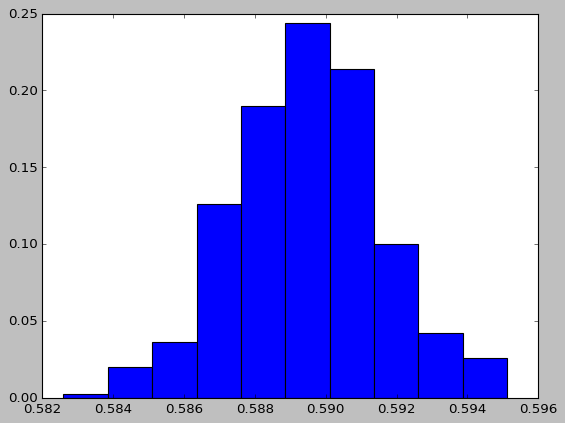

In [172]:
results, edges = np.histogram(data1[1], normed=True)
binWidth = edges[1] - edges[0]
plt.bar(edges[:-1], results*binWidth, binWidth)


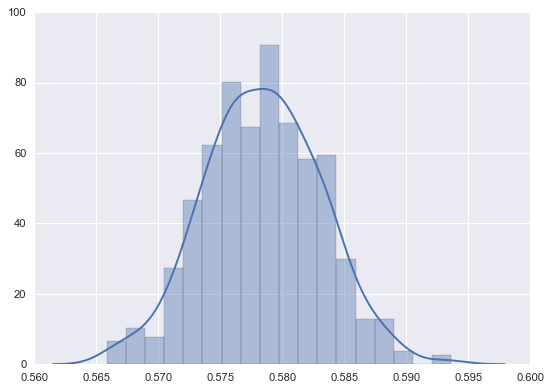

In [60]:
sns.distplot(data1[1])